In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score

In [2]:
df=pd.read_csv("D:\\vaccine\\AstraZenecaLive.csv")

In [ ]:
df1 = pd.DataFrame(columns=['DateTime', 'Tweet_Id', 'Tweet', 'User_Id', 'Retweet', 'Location', 'Label','Country'])

In [3]:
df

Unnamed: 0             DateTime             Tweet_Id  \
0            0  2021-08-05 06:59:55  1423176926869422081   
1            1  2021-08-05 06:59:21  1423176785433219077   
2            2  2021-08-05 06:59:20  1423176780308000769   
3            3  2021-08-05 06:59:15  1423176760946954240   
4            4  2021-08-05 06:57:13  1423176249640316934   
5            5  2021-08-05 06:57:13  1423176247618637826   
6            6  2021-08-05 06:57:05  1423176212919226369   
7            7  2021-08-05 06:57:03  1423176204803264512   
8            8  2021-08-05 06:56:34  1423176085856874498   
9            9  2021-08-05 06:56:28  1423176060997312514   
10          10  2021-08-05 06:56:19  1423176022044733453   
11          11  2021-08-05 06:55:56  1423175924602707971   
12          12  2021-08-05 06:55:50  1423175901370478605   
13          13  2021-08-05 06:55:29  1423175810798678017   
14          14  2021-08-05 06:54:59  1423175685661724673   
15          15  2021-08-05 06:54:28  1423175555860471812   
16          16  2021-08-05 06:53:59  1423175434024349700   
17          17  2021-08-05 06:53:46  1423175379657711616   
18          18  2021-08-05 06:53:19  1423175266436739081   
19          19  2021-08-05 06:52:24  1423175034789453827   
20          20  2021-08-05 06:52:20  1423175018821820427   
21          21  2021-08-05 06:51:53  1423174906867503110   
22          22  2021-08-05 06:51:43  1423174863481499649   
23          23  2021-08-05 06:50:30  1423174557385609218   
24          24  2021-08-05 06:50:09  1423174467543502848   
25          25  2021-08-05 06:49:58  1423174424203726850   
26          26  2021-08-05 06:48:40  1423174094552326146   
27          27  2021-08-05 06:48:35  1423174075917115395   
28          28  2021-08-05 06:47:51  1423173892089155588   
29          29  2021-08-05 06:47:47  1423173873349140481   
..         ...                  ...                  ...   
58          58  2021-08-05 06:39:19  1423171741732409344   
59          59  2021-08-05 06:38:54  1423171639735242757   
60          60  2021-08-02 23:40:43  1422341622038077444   
61          61  2021-08-02 22:59:34  1422331268922896385   
62          62  2021-08-02 21:18:26  1422305816783245312   
63          63  2021-08-02 10:03:18  1422135911899443202   
64          64  2021-08-02 09:59:24  1422134933120716801   
65          65  2021-08-01 21:10:23  1421941402053791744   
66          66  2021-08-01 21:06:08  1421940334188236801   
67          67  2021-08-01 12:57:05  1421817261958914050   
68          68  2021-08-01 11:45:10  1421799163474366466   
69          69  2021-08-01 10:01:33  1421773085506736129   
70          70  2021-08-01 08:43:34  1421753458806247426   
71          71  2021-08-01 08:24:28  1421748653438521347   
72          72  2021-07-30 23:36:29  1421253393029337090   
73          73  2021-07-30 15:40:53  1421133705880510468   
74          74  2021-07-30 15:27:33  1421130351125073927   
75          75  2021-07-30 13:18:12  1421097797625913352   
76          76  2021-07-30 02:19:34  1420932047862779905   
77          77  2021-07-29 15:10:05  1420763564781015041   
78          78  2021-07-28 20:49:44  1420486655358742539   
79          79  2021-08-04 18:38:43  1422990396997742593   
80          80  2021-08-03 13:22:12  1422548358368043008   
81          81  2021-08-03 12:35:46  1422536672755978240   
82          82  2021-08-02 16:00:32  1422225816126165007   
83          83  2021-08-02 10:02:00  1422135587159613446   
84          84  2021-08-02 08:50:33  1422117607184998402   
85          85  2021-07-31 04:16:44  1421323920171487234   
86          86  2021-07-30 18:13:32  1421172123058442241   
87          87  2021-08-05 05:18:54  1423151504559460354   

                                                Tweet              User_Id  \
0   Lockdown 6 vaccine GetVaccinated COVID19Vic co...             34116377   
1   A single dose of AstraZeneca s Covid 19 vaccin...  1201730863035142144   
2   Too many people afraid of AstraZeneca unfortu

In [73]:
df=df.dropna()
df.drop(["index"], axis = 1, inplace = True)
df

KeyError: "['index'] not found in axis"

In [5]:
df.drop(["index"], axis = 1, inplace = True)
df

KeyError: "['index'] not found in axis"

In [20]:
df=df.dropna()
df=df.reset_index()
df=df.head(40)
df

level_0  index  Unnamed: 0             DateTime             Tweet_Id  \
0         0      1           1  2021-08-05 06:59:21  1423176785433219077   
1         1      2           2  2021-08-05 06:59:20  1423176780308000769   
2         2      4           4  2021-08-05 06:57:13  1423176249640316934   
3         3      5           5  2021-08-05 06:57:13  1423176247618637826   
4         4      7           7  2021-08-05 06:57:03  1423176204803264512   
5         5      8           8  2021-08-05 06:56:34  1423176085856874498   
6         6      9           9  2021-08-05 06:56:28  1423176060997312514   
7         7     12          12  2021-08-05 06:55:50  1423175901370478605   
8         8     14          14  2021-08-05 06:54:59  1423175685661724673   
9         9     15          15  2021-08-05 06:54:28  1423175555860471812   
10       10     16          16  2021-08-05 06:53:59  1423175434024349700   
11       11     17          17  2021-08-05 06:53:46  1423175379657711616   
12       12     18          18  2021-08-05 06:53:19  1423175266436739081   
13       13     19          19  2021-08-05 06:52:24  1423175034789453827   
14       14     20          20  2021-08-05 06:52:20  1423175018821820427   
15       15     21          21  2021-08-05 06:51:53  1423174906867503110   
16       16     23          23  2021-08-05 06:50:30  1423174557385609218   
17       17     24          24  2021-08-05 06:50:09  1423174467543502848   
18       18     25          25  2021-08-05 06:49:58  1423174424203726850   
19       19     26          26  2021-08-05 06:48:40  1423174094552326146   
20       20     27          27  2021-08-05 06:48:35  1423174075917115395   
21       21     28          28  2021-08-05 06:47:51  1423173892089155588   
22       22     29          29  2021-08-05 06:47:47  1423173873349140481   
23       23     30          30  2021-08-05 06:47:42  1423173852926857216   
24       24     31          31  2021-08-05 06:47:19  1423173758366355457   
25       25     33          33  2021-08-05 06:46:08  1423173459455004672   
26       26     34          34  2021-08-05 06:45:49  1423173377208975361   
27       27     35          35  2021-08-05 06:45:23  1423173268337463308   
28       28     37          37  2021-08-05 06:44:42  1423173097151025155   
29       29     38          38  2021-08-05 06:44:25  1423173028792262659   
30       30     39          39  2021-08-05 06:44:09  1423172958995066880   
31       31     40          40  2021-08-05 06:43:58  1423172914635952129   
32       32     42          42  2021-08-05 06:42:51  1423172631029637120   
33       33     43          43  2021-08-05 06:42:46  1423172611375312896   
34       34     49          49  2021-08-05 06:41:46  1423172361239465986   
35       35     50          50  2021-08-05 06:41:33  1423172305107267586   
36       36     51          51  2021-08-05 06:41:28  1423172284743815170   
37       37     52          52  2021-08-05 06:40:58  1423172157530525699   
38       38     54          54  2021-08-05 06:40:39  1423172076840669186   
39       39     55          55  2021-08-05 06:40:29  1423172035371421697   

                                                Tweet              User_Id  \
0   A single dose of AstraZeneca s Covid 19 vaccin...  1201730863035142144   
1   Too many people afraid of AstraZeneca unfortun...              7846132   
2   I just get my 2nd AZ COVID19 jab AstraZeneca I...           2859631754   
3   Even every eligible Australian go out today am...            339396638   
4   The Astrazeneca vaccine currently be use in Ke...             21755789   
5   21 NSW people age 27 to 90 have die follow not...            109223169   
6   be report the death of a 34 yr old NSW woman a...           2177412498   
7   Sarah Gilbert a 59 year old professor and co d...              2097571   
8   Barbie debut doll in likeness of Oxford AstraZ...              4970411   
9   And you don t think Andrews have a point there...             39199129   
10  devastate please get vacc

In [23]:
from geopy.geocoders import Nominatim

for i in range(0,len(df)):
    try:
        address=df['Location'][i]
        geolocator = Nominatim(user_agent="Your_Name")
        location = geolocator.geocode(address)
        print(location.latitude, location.longitude)

        location = geolocator.reverse(str(location.latitude) +',' + str(location.longitude))

        address = location.raw['address']
  
        country = address.get('country', '')
        df['Country'][i]=country
    
        print(country)
    except:
        pass
    
                

17.1750495 95.9999652


C:\Users\Amritpal Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


မြန်မာ
52.4796992 -1.9026911
United Kingdom
-24.7761086 134.755
Australia
-1.2566292 36.8858952
Kenya
-33.8548157 151.2164539
Australia
-33.8548157 151.2164539
Australia
49.2608724 -123.113952
Canada
54.2720696 -8.4751357
Éire / Ireland
-33.9001913 151.21339239703877
Australia
-36.3740475 145.4032327649375
Australia
-33.8548157 151.2164539
Australia
55.8609825 -4.2488787
United Kingdom
54.5964411 -5.9302761
United Kingdom
-31.9527121 115.8604796
Australia
-31.9527121 115.8604796
Australia
-37.8142176 144.9631608
Australia
-24.7761086 134.755
Australia
50.67108245 -1.3328042802764226
United Kingdom
-41.5000831 172.8344077
New Zealand / Aotearoa
29.2138338 -81.1216019
United States
61.0666922 -107.991707
Canada
-26.5217028 153.05645462451946
Australia
-26.5217028 153.05645462451946
Australia
51.3813864 -2.3596963
United Kingdom
-33.60974105 150.40522373235163
Australia
28.5421109 -81.3790304
United States
54.7023545 -3.2765753
United Kingdom
-37.8142176 144.9631608
Australia
52.5170365 1

In [67]:
df

level_0  index  Unnamed: 0             DateTime             Tweet_Id  \
0         0      1           1  2021-08-05 06:59:21  1423176785433219077   
1         1      2           2  2021-08-05 06:59:20  1423176780308000769   
2         2      4           4  2021-08-05 06:57:13  1423176249640316934   
3         3      5           5  2021-08-05 06:57:13  1423176247618637826   
4         4      7           7  2021-08-05 06:57:03  1423176204803264512   
5         5      8           8  2021-08-05 06:56:34  1423176085856874498   
6         6      9           9  2021-08-05 06:56:28  1423176060997312514   
7         7     12          12  2021-08-05 06:55:50  1423175901370478605   
8         8     14          14  2021-08-05 06:54:59  1423175685661724673   
9         9     15          15  2021-08-05 06:54:28  1423175555860471812   
10       10     16          16  2021-08-05 06:53:59  1423175434024349700   
11       11     17          17  2021-08-05 06:53:46  1423175379657711616   
12       12     18          18  2021-08-05 06:53:19  1423175266436739081   
13       13     19          19  2021-08-05 06:52:24  1423175034789453827   
14       14     20          20  2021-08-05 06:52:20  1423175018821820427   
15       15     21          21  2021-08-05 06:51:53  1423174906867503110   
16       16     23          23  2021-08-05 06:50:30  1423174557385609218   
17       17     24          24  2021-08-05 06:50:09  1423174467543502848   
18       18     25          25  2021-08-05 06:49:58  1423174424203726850   
19       19     26          26  2021-08-05 06:48:40  1423174094552326146   
20       20     27          27  2021-08-05 06:48:35  1423174075917115395   
21       21     28          28  2021-08-05 06:47:51  1423173892089155588   
22       22     29          29  2021-08-05 06:47:47  1423173873349140481   
23       23     30          30  2021-08-05 06:47:42  1423173852926857216   
24       24     31          31  2021-08-05 06:47:19  1423173758366355457   
25       25     33          33  2021-08-05 06:46:08  1423173459455004672   
26       26     34          34  2021-08-05 06:45:49  1423173377208975361   
27       27     35          35  2021-08-05 06:45:23  1423173268337463308   
28       28     37          37  2021-08-05 06:44:42  1423173097151025155   
29       29     38          38  2021-08-05 06:44:25  1423173028792262659   
30       30     39          39  2021-08-05 06:44:09  1423172958995066880   
31       31     40          40  2021-08-05 06:43:58  1423172914635952129   
32       32     42          42  2021-08-05 06:42:51  1423172631029637120   
33       33     43          43  2021-08-05 06:42:46  1423172611375312896   
34       34     49          49  2021-08-05 06:41:46  1423172361239465986   
35       35     50          50  2021-08-05 06:41:33  1423172305107267586   
36       36     51          51  2021-08-05 06:41:28  1423172284743815170   
37       37     52          52  2021-08-05 06:40:58  1423172157530525699   
38       38     54          54  2021-08-05 06:40:39  1423172076840669186   
39       39     55          55  2021-08-05 06:40:29  1423172035371421697   

                                                Tweet              User_Id  \
0   A single dose of AstraZeneca s Covid 19 vaccin...  1201730863035142144   
1   Too many people afraid of AstraZeneca unfortun...              7846132   
2   I just get my 2nd AZ COVID19 jab AstraZeneca I...           2859631754   
3   Even every eligible Australian go out today am...            339396638   
4   The Astrazeneca vaccine currently be use in Ke...             21755789   
5   21 NSW people age 27 to 90 have die follow not...            109223169   
6   be report the death of a 34 yr old NSW woman a...           2177412498   
7   Sarah Gilbert a 59 year old professor and co d...              2097571   
8   Barbie debut doll in likeness of Oxford AstraZ...              4970411   
9   And you don t think Andrews have a point there...             39199129   
10  devastate please get vacc

In [62]:
df2=dict(df['Country'].value_counts())

In [63]:
df2.keys()

dict_keys(['Australia', 'United Kingdom', 'Canada', 'United States', 'New Zealand / Aotearoa', 'Éire / Ireland', 'မြန်မာ', 'Deutschland', 'Kenya'])

Neutral            10
Highly_Negative     6
Weakly_Positive     5
Highly_Positive     2
Name: Label, dtype: int64
Neutral            11
Weakly_Positive     8
Highly_Negative     8
Highly_Positive     2
Weakly_Negative     1
Name: Label, dtype: int64
Neutral            11
Weakly_Positive    10
Highly_Negative     8
Highly_Positive     3
Weakly_Negative     1
Name: Label, dtype: int64
Neutral            13
Weakly_Positive    10
Highly_Negative     8
Highly_Positive     3
Weakly_Negative     1
Name: Label, dtype: int64
Neutral            13
Weakly_Positive    11
Highly_Negative     8
Highly_Positive     3
Weakly_Negative     1
Name: Label, dtype: int64


FileNotFoundError: [Errno 2] No such file or directory: 'D:/vaccine/static/pieNew Zealand / Aotearoa.png'

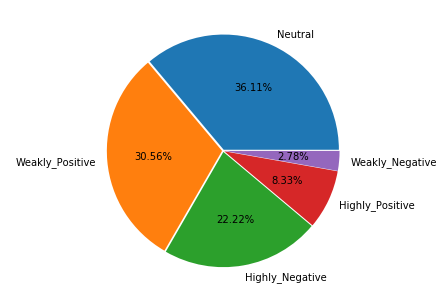

In [90]:
df2=dict(df['Country'].value_counts())
df1 = pd.DataFrame(columns=['DateTime', 'Tweet_Id', 'Tweet', 'User_Id', 'Retweet', 'Location', 'Label','Country'])
for i in df2.keys():
    for j in range(len(df)):
        if i==df['Country'][j]:
            df1=df1.append(df.iloc[j])
    sentiment = df1['Label'].value_counts()

    print(sentiment)
    total=0
    size=[]

    for l in sentiment.values:
        total+=l
        size.append(l)
    
    
    
    
    explode =[]
    for m in range(len(sentiment)):
        explode.append(0.01)
        
    explode=tuple(explode)
    
    
    #correct this labels=['Positive '+str(round((pos/total)*100,2))+'%','Neutral '+str(round((neutral/total)*100,2))+'%','Negative '+str(round((neg/total)*100,2))+'%']
    
    
    l2=sentiment.keys()
    #fig=plt.figure()

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('equal')
    ax.pie(size, labels=l2, autopct='%1.2f%%',explode=explode)
    k=i

    plt.savefig("D:/vaccine/static/pie"+str(k)+".png", bbox_inches='tight')

    plt.close()
    

In [82]:
df1.append(df.iloc[0])

DateTime             Tweet_Id  \
0  2021-08-05 06:59:21  1423176785433219077   

                                               Tweet              User_Id  \
0  A single dose of AstraZeneca s Covid 19 vaccin...  1201730863035142144   

  Retweet Location            Label Country  Unnamed: 0  index  level_0  
0      26  Myanmar  Weakly_Positive  မြန်မာ         1.0    1.0      0.0

In [ ]:
    for i in range(len(d)):
        list1=[d["Positive_Tweets_per"][i],d["NonPositive_Tweets_per"][i]]
        colors = ['#00FF00', '#fedc02']
        explode = (0.03, 0.03)
        l2=["Positive_Tweets_per","NonPositive_Tweets_per"]
# Pie Chart
        angle = -180 * list1[0]
        plt.pie(list1, colors=colors, labels=l2, startangle= angle,
            autopct='%1.1f%%', pctdistance=0.85,
            explode=explode)

# draw circle
        centre_circle = plt.Circle((0, 0), 0.60, fc='white')
        fig = plt.gcf()

# Adding Circle in Pie chart
        fig.gca().add_artist(centre_circle)


        # Adding Title of chart
        plt.title('Positive Tweets % vs Non-Positive Tweets %')

# Displaing Chart
        k = i
        plt.savefig("D:/vaccine/static/"+str(k)+".png", bbox_inches='tight')
        plt.close()

In [93]:
sentiment=[]
df2=dict(df['Country'].value_counts())
df1 = pd.DataFrame(columns=['DateTime', 'Tweet_Id', 'Tweet', 'User_Id', 'Retweet', 'Location', 'Label','Country'])
for i in df2.keys():
    for j in range(len(df)):
        if i==df['Country'][j]:
            df1=df1.append(df.iloc[j])
    sentiment.append([df1['Label'].value_counts()])
    
print(sentiment)


[[Neutral            10
Highly_Negative     6
Weakly_Positive     5
Highly_Positive     2
Name: Label, dtype: int64], [Neutral            11
Weakly_Positive     8
Highly_Negative     8
Highly_Positive     2
Weakly_Negative     1
Name: Label, dtype: int64], [Neutral            11
Weakly_Positive    10
Highly_Negative     8
Highly_Positive     3
Weakly_Negative     1
Name: Label, dtype: int64], [Neutral            13
Weakly_Positive    10
Highly_Negative     8
Highly_Positive     3
Weakly_Negative     1
Name: Label, dtype: int64], [Neutral            13
Weakly_Positive    11
Highly_Negative     8
Highly_Positive     3
Weakly_Negative     1
Name: Label, dtype: int64], [Neutral            14
Weakly_Positive    11
Highly_Negative     8
Highly_Positive     3
Weakly_Negative     1
Name: Label, dtype: int64], [Neutral            14
Weakly_Positive    12
Highly_Negative     8
Highly_Positive     3
Weakly_Negative     1
Name: Label, dtype: int64], [Neutral            14
Weakly_Positive    12
Hig

In [99]:
sentiment

[[Neutral            10
  Highly_Negative     6
  Weakly_Positive     5
  Highly_Positive     2
  Name: Label, dtype: int64], [Neutral            11
  Weakly_Positive     8
  Highly_Negative     8
  Highly_Positive     2
  Weakly_Negative     1
  Name: Label, dtype: int64], [Neutral            11
  Weakly_Positive    10
  Highly_Negative     8
  Highly_Positive     3
  Weakly_Negative     1
  Name: Label, dtype: int64], [Neutral            13
  Weakly_Positive    10
  Highly_Negative     8
  Highly_Positive     3
  Weakly_Negative     1
  Name: Label, dtype: int64], [Neutral            13
  Weakly_Positive    11
  Highly_Negative     8
  Highly_Positive     3
  Weakly_Negative     1
  Name: Label, dtype: int64], [Neutral            14
  Weakly_Positive    11
  Highly_Negative     8
  Highly_Positive     3
  Weakly_Negative     1
  Name: Label, dtype: int64], [Neutral            14
  Weakly_Positive    12
  Highly_Negative     8
  Highly_Positive     3
  Weakly_Negative     1
  Name: La

In [101]:
for item in sentiment:
    print(item)

[Neutral            10
Highly_Negative     6
Weakly_Positive     5
Highly_Positive     2
Name: Label, dtype: int64]
[Neutral            11
Weakly_Positive     8
Highly_Negative     8
Highly_Positive     2
Weakly_Negative     1
Name: Label, dtype: int64]
[Neutral            11
Weakly_Positive    10
Highly_Negative     8
Highly_Positive     3
Weakly_Negative     1
Name: Label, dtype: int64]
[Neutral            13
Weakly_Positive    10
Highly_Negative     8
Highly_Positive     3
Weakly_Negative     1
Name: Label, dtype: int64]
[Neutral            13
Weakly_Positive    11
Highly_Negative     8
Highly_Positive     3
Weakly_Negative     1
Name: Label, dtype: int64]
[Neutral            14
Weakly_Positive    11
Highly_Negative     8
Highly_Positive     3
Weakly_Negative     1
Name: Label, dtype: int64]
[Neutral            14
Weakly_Positive    12
Highly_Negative     8
Highly_Positive     3
Weakly_Negative     1
Name: Label, dtype: int64]
[Neutral            14
Weakly_Positive    12
Highly_Nega

In [102]:
df2.keys()

dict_keys(['Australia', 'United Kingdom', 'Canada', 'United States', 'New Zealand / Aotearoa', 'Éire / Ireland', 'မြန်မာ', 'Deutschland', 'Kenya'])

In [1]:
import tweepy
from tweepy.streaming import StreamListener
from tweepy import *
import pandas as pd



def extractTweets(keyword, count, woeid_code, item):
    api_key = "EmGjNutMOFkjcOJhrkiEkqVXq"
    api_secret = "XjElQEoclGogHUUlaicIbfYjbl1YNLLyhO5WkhjTVM4VmV1JpG"

    access_token = "1393248498502483968-Npak2qPjOGBRhaQRLEq1ZjmIwfKxol"
    access_secret = "XOKJiqKqn8VF7yTzq8LpXYFu4OcEaexqP6ns3yxtTuIYu"

    auth = tweepy.OAuthHandler(api_key, api_secret)
    auth.set_access_token(access_token, access_secret)

    apitweet = tweepy.API(auth)

    df = pd.DataFrame(columns=['DateTime', 'Tweet_Id', 'Tweet', 'User_Id', 'Retweet', 'Location', 'Label'])

    n = 0
    tweets = tweepy.Cursor(apitweet.search, wait_on_rate_limit=True, q=keyword,
                           lang="en", woeid=woeid_code , count=count).items(item)
    for tw in tweets:

        try:
            if tw.text!="" and tw.id !="" and tw.entities['user_mentions'][0]['id']!="":
                df.loc[n, 'DateTime'] = tw.created_at
                df.loc[n, 'Location'] = tw.user.location
                df.loc[n, 'Retweet'] = tw.retweet_count
                df.loc[n, 'Tweet_Id'] = tw.id
                df.loc[n, 'User_Id'] = tw.entities['user_mentions'][0]['id']
                df.loc[n, 'Tweet'] = tw.text

            n += 1

        except:
            pass

    df.drop_duplicates(subset="Tweet", keep=False, inplace=True)

    df.reset_index(inplace=True)
    df = df.drop(columns=['index'])

    for i in range(len(df)):
        df['Tweet'][i] = cleanTweet(df['Tweet'][i])

    return df


def vaccine(list1, k, j):
    tempdf = pd.DataFrame(columns=['DateTime', 'Tweet_Id', 'Tweet', 'User_Id', 'Retweet', 'Location', 'Label'])
    for i in list1:
        print(i)
        tempdf=tempdf.append(extractTweets(i, j, k, 200),ignore_index=True)
    return tempdf


In [2]:

from textblob import TextBlob

import pandas as pd


def sentiMent(dataset):

    
    for i in range(0,len(dataset)):
        tweet1 = dataset['Tweet'][i]
        analysis=TextBlob(tweet1)
        
        if analysis.polarity==0:
            l='Neutral'
        
        elif analysis.polarity > 0:
            if analysis.polarity<0.5:
                l='Weakly_Positive'
            else:
                l='Highly_Positive'
        elif analysis.polarity < 0 :
            if analysis.polarity>-0.5:
                l='Highly_Negative'
            else:
                l='Weakly_Negative'
        
            
         
        dataset['Label'][i]=l
       
        
    return dataset
        
        


In [33]:
import pandas as pd

import matplotlib.pyplot as plt


def sentiFig(dataset):
    sentiment = dataset['Label'].value_counts()

    print(sentiment)
    total = 0
    size = []

    for l in sentiment.values:
        total += l
        size.append(l)

    explode = []
    for m in range(len(sentiment)):
        explode.append(0.01)

    explode = tuple(explode)

    l2 = sentiment.keys()

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('equal')
    ax.pie(size, labels=l2, autopct='%1.2f%%', explode=explode)
    plt.show()

    
    return True




In [4]:

import re
from textblob import TextBlob


def cleanTweet(tweet):

    # Remove Links, Special Characters etc from tweet
    tweet=re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)

    tweet=re.sub('RT','',tweet)
    tweet=' '.join(re.sub("@[\w]*"," ",tweet).split())
        
    tweet=' '.join(re.sub("([^a-zA-Z0-9#])"," ",tweet).split())

                             
    return tweet

In [7]:


import math

import re

from wordcloud import WordCloud, STOPWORDS

from matplotlib import pyplot as plt



def makeWordCloud(dataset):
    neg=''
    pos=''
    neu=''


    for i in range(0,len(dataset)):
        if dataset['Label'][i]=="Neutral":
            tweet=dataset['Tweet'][i]
            tweet=str(tweet)
            tweet = tweet.replace('RT', '')
            tweet = tweet.split(' ')
            for token in tweet:
                neu += token.lower() + ' '

        elif dataset['Label'][i] == "Highly_Positive" or dataset['Label'][i] == "Weakly_Positive":
            tweet = dataset['Tweet'][i]
            tweet = str(tweet)
            tweet = tweet.replace('RT', '')
            tweet = tweet.split(' ')
            for token in tweet:
                pos += token.lower() + ' '

        elif dataset['Label'][i] == "Highly_Negative" or dataset['Label'][i] == "Weakly_Negative":
            tweet = dataset['Tweet'][i]
            tweet = str(tweet)
            tweet = tweet.replace('RT', '')
            tweet = tweet.split(' ')
            for token in tweet:
                neg += token.lower() + ' '

    stopwords = set(STOPWORDS)


    wordcloud1=WordCloud(background_color='white',width=800,height=800,stopwords=stopwords,min_font_size=10).generate(pos)

    plt.imshow(wordcloud1)

    wordcloud2 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neg)

    plt.imshow(wordcloud2)

    wordcloud3 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neu)

    plt.imshow(wordcloud3)
    
    return True

23424848
AstraZeneca
AstraZeneca
astrazenecavaccine
OXFORDVACCINE
GenXZeneca
Neutral            26
Weakly_Positive    16
Highly_Negative     5
Weakly_Negative     5
Highly_Positive     4
Name: Label, dtype: int64


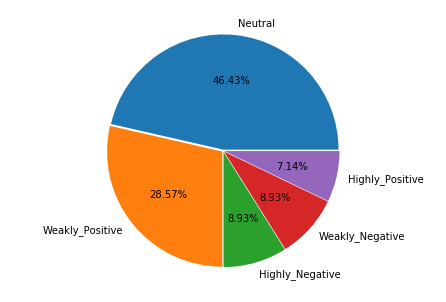

Covishield
covishield


KeyboardInterrupt: 

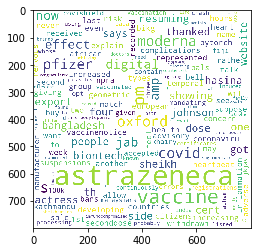

In [16]:
list2 = ['AstraZeneca','Covishield','Moderna','SputnikV','Pfizer',"Covaxin"]
dict1={'India':23424848, 'Australia':23424748,"USA":23424977}
for j in dict1.values():
    print(j)
    for i in list2:
        print(i)
        if i == "AstraZeneca":
            list1 = ["AstraZeneca", "astrazenecavaccine", "OXFORDVACCINE", "GenXZeneca"]
        elif i == "Covishield":
            list1 = ["covishield", "covishieldvaccine", "covishieldsideeffects"]
        elif i == "Moderna":
            list1 = ["Moderna"]
        elif i == "SputnikV":
            list1 = ["SputnikV", "sputnik", "SputnikLight"]
        elif i == "Pfizer":
            list1 = ["Pfizer", "PfizerVaccine"]
        elif i == "Covaxin":
            list1 = ["#covaxin", "#covaxine", "#BharatBiotech", "#covaxininhungary", "#COVAXIN"]

        df = vaccine(list1,j, 100)
        df=sentiMent(df)
        img=sentiFig(df)
        img2=makeWordCloud(df)
        

# India

In [126]:
import tweepy
from tweepy.streaming import StreamListener
from tweepy import *
import pandas as pd



def extractTweets(keyword, count, item):
    api_key = "EmGjNutMOFkjcOJhrkiEkqVXq"
    api_secret = "XjElQEoclGogHUUlaicIbfYjbl1YNLLyhO5WkhjTVM4VmV1JpG"

    access_token = "1393248498502483968-Npak2qPjOGBRhaQRLEq1ZjmIwfKxol"
    access_secret = "XOKJiqKqn8VF7yTzq8LpXYFu4OcEaexqP6ns3yxtTuIYu"

    auth = tweepy.OAuthHandler(api_key, api_secret)
    auth.set_access_token(access_token, access_secret)

    apitweet = tweepy.API(auth)

    df = pd.DataFrame(columns=['DateTime', 'Tweet_Id', 'Tweet', 'User_Id', 'Retweet', 'Location', 'Label'])

    n = 0
    
    api = tweepy.API(auth)
    places = api.geo_search(query="India",granularity="country")
    place_id = places[0].id

    tweets = tweepy.Cursor(apitweet.search, wait_on_rate_limit=True, q=keyword and "place:%s" % place_id,
                           lang="en", count=count).items(item)
    for tw in tweets:

        try:
            if tw.text!="" and tw.id !="" and tw.entities['user_mentions'][0]['id']!="":
                df.loc[n, 'DateTime'] = tw.created_at
                df.loc[n, 'Location'] = tw.user.location
                df.loc[n, 'Retweet'] = tw.retweet_count
                df.loc[n, 'Tweet_Id'] = tw.id
                df.loc[n, 'User_Id'] = tw.entities['user_mentions'][0]['id']
                df.loc[n, 'Tweet'] = tw.text

            n += 1

        except:
            pass

    df.drop_duplicates(subset="Tweet", keep=False, inplace=True)

    df.reset_index(inplace=True)
    df = df.drop(columns=['index'])

    for i in range(len(df)):
        df['Tweet'][i] = cleanTweet(df['Tweet'][i])

    return df


def vaccine(list1, j):
    tempdf = pd.DataFrame(columns=['DateTime', 'Tweet_Id', 'Tweet', 'User_Id', 'Retweet', 'Location', 'Label'])
    for i in list1:
        print(i)
        tempdf=tempdf.append(extractTweets(i, j, 500),ignore_index=True)
    return tempdf


# Astrazeneca

In [8]:

from textblob import TextBlob

import pandas as pd


def sentiMent(dataset):

    
    for i in range(0,len(dataset)):
        tweet1 = dataset['Tweet'][i]
        analysis=TextBlob(tweet1)
        
        if analysis.polarity==0:
            l='Neutral'
        
        elif analysis.polarity > 0:
            if analysis.polarity<0.5:
                l='Weakly_Positive'
            else:
                l='Highly_Positive'
        elif analysis.polarity < 0 :
            if analysis.polarity>-0.5:
                l='Highly_Negative'
            else:
                l='Weakly_Negative'
        
            
         
        dataset['Label'][i]=l
       
        
    return dataset
        

In [128]:
import pandas as pd

import matplotlib.pyplot as plt


def sentiFig(dataset):
    sentiment = dataset['Label'].value_counts()

    print(sentiment)
    total = 0
    size = []

    for l in sentiment.values:
        total += l
        size.append(l)

    explode = []
    for m in range(len(sentiment)):
        explode.append(0.01)

    explode = tuple(explode)

    l2 = sentiment.keys()

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('equal')
    ax.pie(size, labels=l2, autopct='%1.2f%%', explode=explode)

    plt.show()

    
    return True

In [129]:

import re
from textblob import TextBlob


def cleanTweet(tweet):

    # Remove Links, Special Characters etc from tweet
    tweet=re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)

    tweet=re.sub('RT','',tweet)
    tweet=' '.join(re.sub("@[\w]*"," ",tweet).split())
        
    tweet=' '.join(re.sub("([^a-zA-Z0-9#])"," ",tweet).split())

                             
    return tweet

AstraZeneca
astrazenecavaccine
OXFORDVACCINE
GenXZeneca
Neutral            651
Weakly_Positive    242
Highly_Positive    201
Highly_Negative     83
Weakly_Negative     31
Name: Label, dtype: int64


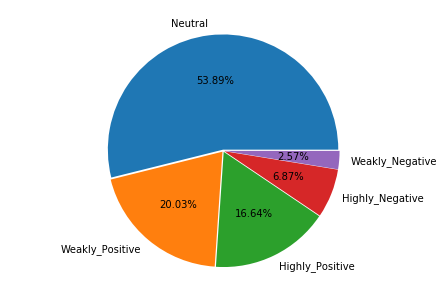

In [130]:
list1 = ["AstraZeneca", "astrazenecavaccine", "OXFORDVACCINE", "GenXZeneca"]

dataset = vaccine(list1, 100)
dataset=sentiMent(dataset)
img=sentiFig(dataset)

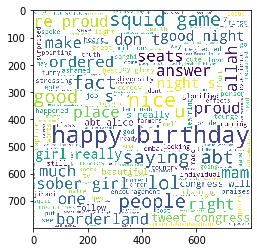

In [131]:
neg=''
pos=''
neu=''


for i in range(0,len(dataset)):
    if dataset['Label'][i]=="Neutral":
        tweet=dataset['Tweet'][i]
        tweet=str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neu += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Positive" or dataset['Label'][i] == "Weakly_Positive":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            pos += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Negative" or dataset['Label'][i] == "Weakly_Negative":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neg += token.lower() + ' '

stopwords = set(STOPWORDS)


wordcloud1=WordCloud(background_color='white',width=800,height=800,stopwords=stopwords,min_font_size=10).generate(pos)

plt.imshow(wordcloud1)

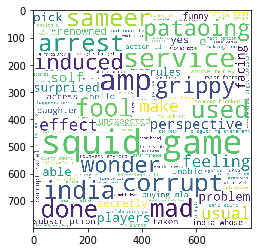

In [132]:
wordcloud2 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neg)

plt.imshow(wordcloud2)

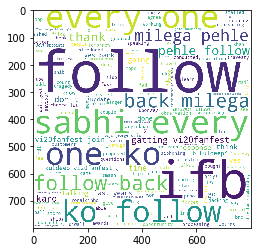

In [133]:
wordcloud3 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neu)

plt.imshow(wordcloud3)

# Covishield

covishield
covishieldvaccine
covishieldsideeffects
covishieldvaccinesideeffects
Neutral            647
Weakly_Positive    241
Highly_Positive    196
Highly_Negative     99
Weakly_Negative     24
Name: Label, dtype: int64


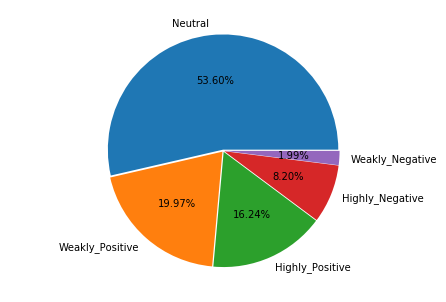

In [134]:
list1 = ["covishield", "covishieldvaccine", "covishieldsideeffects","covishieldvaccinesideeffects"]
dataset = vaccine(list1, 100)
dataset=sentiMent(dataset)
img=sentiFig(dataset)

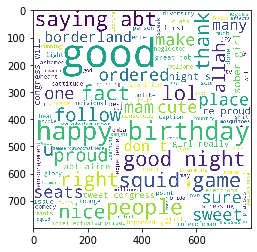

In [135]:
neg=''
pos=''
neu=''


for i in range(0,len(dataset)):
    if dataset['Label'][i]=="Neutral":
        tweet=dataset['Tweet'][i]
        tweet=str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neu += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Positive" or dataset['Label'][i] == "Weakly_Positive":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            pos += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Negative" or dataset['Label'][i] == "Weakly_Negative":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neg += token.lower() + ' '

stopwords = set(STOPWORDS)


wordcloud1=WordCloud(background_color='white',width=800,height=800,stopwords=stopwords,min_font_size=10).generate(pos)

plt.imshow(wordcloud1)

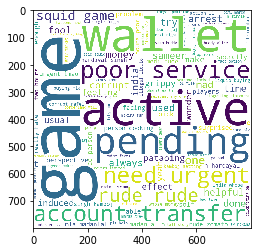

In [136]:
wordcloud2 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neg)

plt.imshow(wordcloud2)

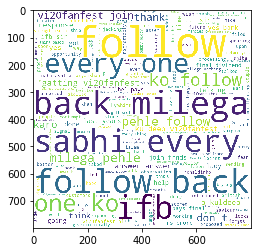

In [137]:
wordcloud3 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neu)

plt.imshow(wordcloud3)

# Covaxin

#covaxin
#covaxine
#BharatBiotech
#covaxininhungary
Neutral            672
Weakly_Positive    217
Highly_Positive    192
Highly_Negative     89
Weakly_Negative     34
Name: Label, dtype: int64


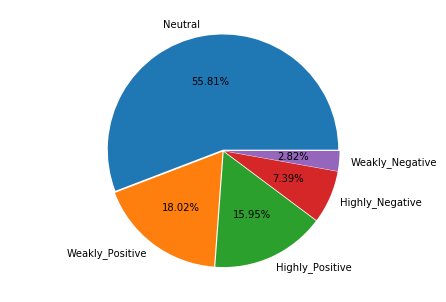

In [138]:
list1 = ["#covaxin", "#covaxine", "#BharatBiotech", "#covaxininhungary"]
dataset = vaccine(list1, 100)
dataset=sentiMent(dataset)
img=sentiFig(dataset)

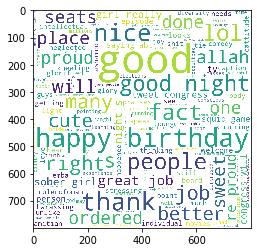

In [139]:
neg=''
pos=''
neu=''


for i in range(0,len(dataset)):
    if dataset['Label'][i]=="Neutral":
        tweet=dataset['Tweet'][i]
        tweet=str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neu += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Positive" or dataset['Label'][i] == "Weakly_Positive":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            pos += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Negative" or dataset['Label'][i] == "Weakly_Negative":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neg += token.lower() + ' '

stopwords = set(STOPWORDS)


wordcloud1=WordCloud(background_color='white',width=800,height=800,stopwords=stopwords,min_font_size=10).generate(pos)

plt.imshow(wordcloud1)

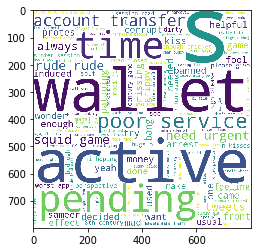

In [140]:
wordcloud2 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neg)

plt.imshow(wordcloud2)

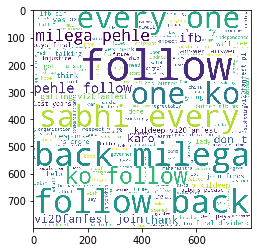

In [141]:
wordcloud3 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neu)

plt.imshow(wordcloud3)

# Moderna

Moderna
moderna booster
moderna booster side effects
moderna booster side-effects
Neutral            729
Weakly_Positive    205
Highly_Positive    182
Highly_Negative    145
Weakly_Negative     23
Name: Label, dtype: int64


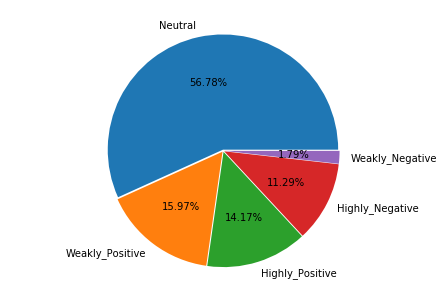

In [143]:
list1 = ["Moderna",'moderna booster','moderna booster side effects','moderna booster side-effects']
dataset = vaccine(list1, 100)
dataset=sentiMent(dataset)
img=sentiFig(dataset)

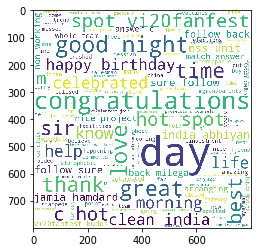

In [147]:
neg=''
pos=''
neu=''


for i in range(0,len(dataset)): 
    
    if dataset['Label'][i]=="Neutral":
        tweet=dataset['Tweet'][i]
        tweet=str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neu += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Positive" or dataset['Label'][i] == "Weakly_Positive":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            pos += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Negative" or dataset['Label'][i] == "Weakly_Negative":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neg += token.lower() + ' '

stopwords = set(STOPWORDS)


wordcloud1=WordCloud(background_color='white',width=800,height=800,stopwords=stopwords,min_font_size=10).generate(pos)

plt.imshow(wordcloud1)

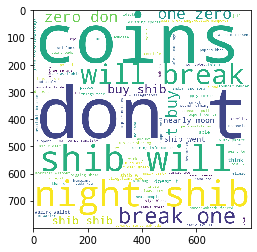

In [148]:
wordcloud2 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neg)

plt.imshow(wordcloud2)

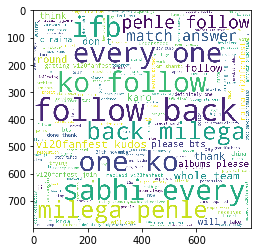

In [149]:
wordcloud3 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neu)

plt.imshow(wordcloud3)

# SputnikV

SputnikV
sputnik
SputnikLight
Sputnik
Neutral            730
Weakly_Positive    208
Highly_Positive    163
Highly_Negative    146
Weakly_Negative     24
Name: Label, dtype: int64


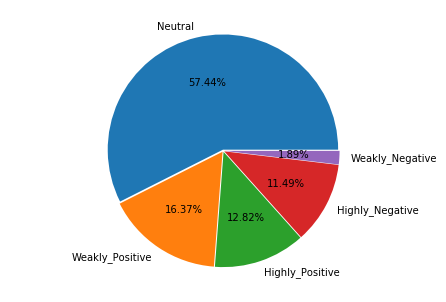

In [150]:
list1 = ["SputnikV", "sputnik", "SputnikLight","Sputnik"]
dataset = vaccine(list1, 100)
dataset=sentiMent(dataset)
img=sentiFig(dataset)

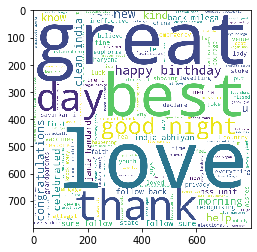

In [151]:
neg=''
pos=''
neu=''


for i in range(0,len(dataset)):
    if dataset['Label'][i]=="Neutral":
        tweet=dataset['Tweet'][i]
        tweet=str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neu += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Positive" or dataset['Label'][i] == "Weakly_Positive":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            pos += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Negative" or dataset['Label'][i] == "Weakly_Negative":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neg += token.lower() + ' '

stopwords = set(STOPWORDS)


wordcloud1=WordCloud(background_color='white',width=800,height=800,stopwords=stopwords,min_font_size=10).generate(pos)

plt.imshow(wordcloud1)

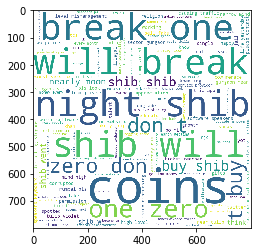

In [152]:
wordcloud2 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neg)

plt.imshow(wordcloud2)

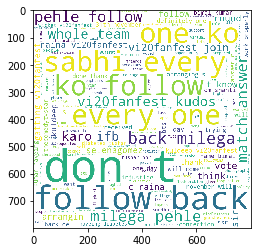

In [153]:
wordcloud3 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neu)

plt.imshow(wordcloud3)

# Pfizer

Pfizer
PfizerVaccine
Pfizer vaccine
pfizer vaccine side effects
Neutral            739
Weakly_Positive    212
Highly_Positive    154
Highly_Negative    143
Weakly_Negative     25
Name: Label, dtype: int64


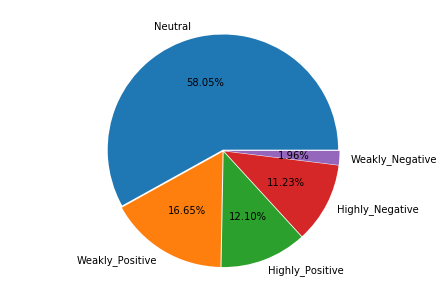

In [154]:
list1 = list1 = ["Pfizer", "PfizerVaccine","Pfizer vaccine", "pfizer vaccine side effects"]
dataset = vaccine(list1, 100)
dataset=sentiMent(dataset)
img=sentiFig(dataset)

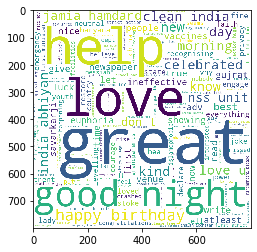

In [155]:
neg=''
pos=''
neu=''


for i in range(0,len(dataset)):
    if dataset['Label'][i]=="Neutral":
        tweet=dataset['Tweet'][i]
        tweet=str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neu += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Positive" or dataset['Label'][i] == "Weakly_Positive":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            pos += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Negative" or dataset['Label'][i] == "Weakly_Negative":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neg += token.lower() + ' '

stopwords = set(STOPWORDS)


wordcloud1=WordCloud(background_color='white',width=800,height=800,stopwords=stopwords,min_font_size=10).generate(pos)

plt.imshow(wordcloud1)

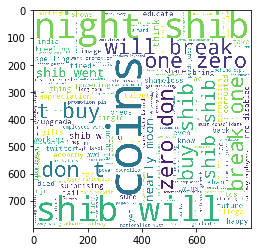

In [157]:
wordcloud2 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neg)

plt.imshow(wordcloud2)

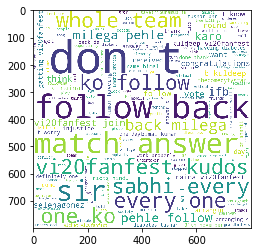

In [156]:
wordcloud3 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neu)

plt.imshow(wordcloud3)

# USA

In [55]:
import tweepy
from tweepy.streaming import StreamListener
from tweepy import *
import pandas as pd



def extractTweets(keyword, count, item):
    api_key = "EmGjNutMOFkjcOJhrkiEkqVXq"
    api_secret = "XjElQEoclGogHUUlaicIbfYjbl1YNLLyhO5WkhjTVM4VmV1JpG"

    access_token = "1393248498502483968-Npak2qPjOGBRhaQRLEq1ZjmIwfKxol"
    access_secret = "XOKJiqKqn8VF7yTzq8LpXYFu4OcEaexqP6ns3yxtTuIYu"

    auth = tweepy.OAuthHandler(api_key, api_secret)
    auth.set_access_token(access_token, access_secret)

    apitweet = tweepy.API(auth)

    df = pd.DataFrame(columns=['DateTime', 'Tweet_Id', 'Tweet', 'User_Id', 'Retweet', 'Location', 'Label'])

    n = 0
    
    api = tweepy.API(auth)
    places = api.geo_search(query="USA",granularity="country")
    place_id = places[0].id

    tweets = tweepy.Cursor(apitweet.search, wait_on_rate_limit=True, q=keyword and "place:%s" % place_id,
                           lang="en", count=count).items(item)
    for tw in tweets:

        try:
            if tw.text!="" and tw.id !="" and tw.entities['user_mentions'][0]['id']!="":
                df.loc[n, 'DateTime'] = tw.created_at
                df.loc[n, 'Location'] = tw.user.location
                df.loc[n, 'Retweet'] = tw.retweet_count
                df.loc[n, 'Tweet_Id'] = tw.id
                df.loc[n, 'User_Id'] = tw.entities['user_mentions'][0]['id']
                df.loc[n, 'Tweet'] = tw.text

            n += 1

        except:
            pass

    df.drop_duplicates(subset="Tweet", keep=False, inplace=True)

    df.reset_index(inplace=True)
    df = df.drop(columns=['index'])

    for i in range(len(df)):
        df['Tweet'][i] = cleanTweet(df['Tweet'][i])

    return df


def vaccine(list1, j):
    tempdf = pd.DataFrame(columns=['DateTime', 'Tweet_Id', 'Tweet', 'User_Id', 'Retweet', 'Location', 'Label'])
    for i in list1:
        print(i)
        tempdf=tempdf.append(extractTweets(i, j, 500),ignore_index=True)
    return tempdf


# AstraZeneca

AstraZeneca
astrazenecavaccine
OXFORDVACCINE
GenXZeneca
Neutral            373
Weakly_Positive    185
Highly_Positive    157
Highly_Negative     89
Weakly_Negative     21
Name: Label, dtype: int64


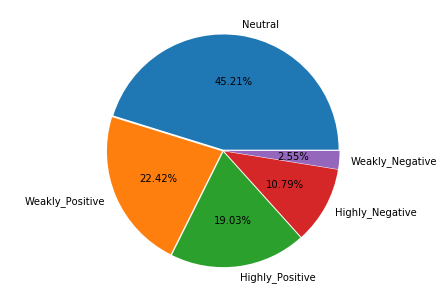

In [56]:
list1 = ["AstraZeneca", "astrazenecavaccine", "OXFORDVACCINE", "GenXZeneca"]

dataset = vaccine(list1, 100)
dataset=sentiMent(dataset)
img=sentiFig(dataset)

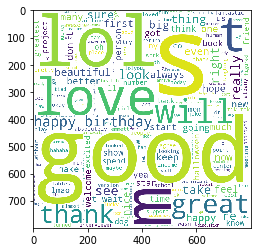

In [57]:
import math

import re

from wordcloud import WordCloud, STOPWORDS

from matplotlib import pyplot as plt

neg=''
pos=''
neu=''


for i in range(0,len(dataset)):
    if dataset['Label'][i]=="Neutral":
        tweet=dataset['Tweet'][i]
        tweet=str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neu += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Positive" or dataset['Label'][i] == "Weakly_Positive":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            pos += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Negative" or dataset['Label'][i] == "Weakly_Negative":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neg += token.lower() + ' '

stopwords = set(STOPWORDS)


wordcloud1=WordCloud(background_color='white',width=800,height=800,stopwords=stopwords,min_font_size=10).generate(pos)

plt.imshow(wordcloud1)

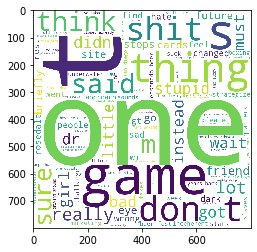

In [58]:
wordcloud2 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neg)

plt.imshow(wordcloud2)

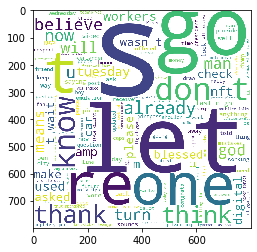

In [59]:
wordcloud3 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neu)

plt.imshow(wordcloud3)

# Covishield

covishield
covishieldvaccine
covishieldsideeffects
covishieldvaccinesideeffects
Neutral            399
Weakly_Positive    243
Highly_Positive    139
Highly_Negative     86
Weakly_Negative     26
Name: Label, dtype: int64


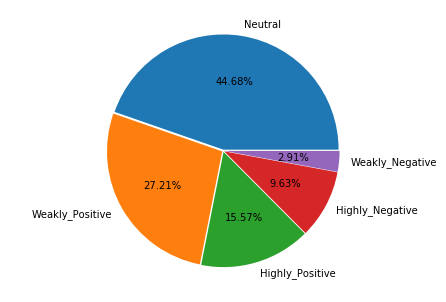

In [60]:
list1 = ["covishield", "covishieldvaccine", "covishieldsideeffects","covishieldvaccinesideeffects"]
dataset = vaccine(list1, 100)
dataset=sentiMent(dataset)
img=sentiFig(dataset)

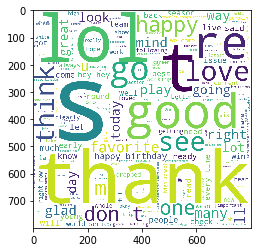

In [61]:
neg=''
pos=''
neu=''


for i in range(0,len(dataset)):
    if dataset['Label'][i]=="Neutral":
        tweet=dataset['Tweet'][i]
        tweet=str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neu += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Positive" or dataset['Label'][i] == "Weakly_Positive":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            pos += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Negative" or dataset['Label'][i] == "Weakly_Negative":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neg += token.lower() + ' '

stopwords = set(STOPWORDS)


wordcloud1=WordCloud(background_color='white',width=800,height=800,stopwords=stopwords,min_font_size=10).generate(pos)

plt.imshow(wordcloud1)

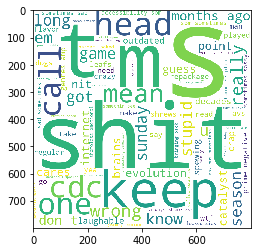

In [62]:
wordcloud2 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neg)

plt.imshow(wordcloud2)

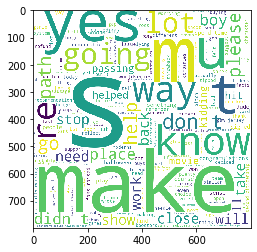

In [63]:
wordcloud3 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neu)

plt.imshow(wordcloud3)

# Covaxin

#covaxin
#covaxine
#BharatBiotech
#covaxininhungary
Neutral            400
Weakly_Positive    226
Highly_Positive    143
Highly_Negative     93
Weakly_Negative     37
Name: Label, dtype: int64


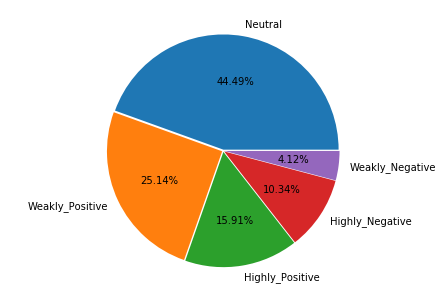

In [64]:
list1 = ["#covaxin", "#covaxine", "#BharatBiotech", "#covaxininhungary"]
dataset = vaccine(list1, 100)
dataset=sentiMent(dataset)
img=sentiFig(dataset)

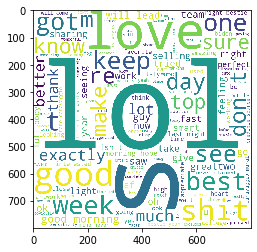

In [65]:
neg=''
pos=''
neu=''


for i in range(0,len(dataset)):
    if dataset['Label'][i]=="Neutral":
        tweet=dataset['Tweet'][i]
        tweet=str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neu += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Positive" or dataset['Label'][i] == "Weakly_Positive":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            pos += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Negative" or dataset['Label'][i] == "Weakly_Negative":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neg += token.lower() + ' '

stopwords = set(STOPWORDS)


wordcloud1=WordCloud(background_color='white',width=800,height=800,stopwords=stopwords,min_font_size=10).generate(pos)

plt.imshow(wordcloud1)

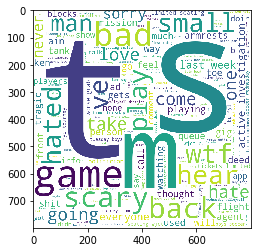

In [66]:
wordcloud2 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neg)

plt.imshow(wordcloud2)

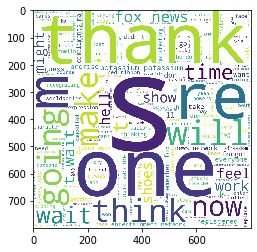

In [67]:
wordcloud3 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neu)

plt.imshow(wordcloud3)

# Moderna

Moderna
moderna booster
moderna booster side effects
moderna booster side-effects
Neutral            372
Weakly_Positive    207
Highly_Positive    131
Highly_Negative     98
Weakly_Negative     21
Name: Label, dtype: int64


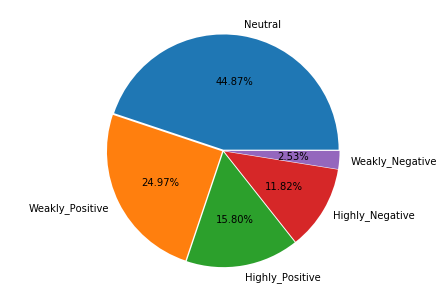

In [68]:
list1 = ["Moderna",'moderna booster','moderna booster side effects','moderna booster side-effects']
dataset = vaccine(list1, 100)
dataset=sentiMent(dataset)
img=sentiFig(dataset)

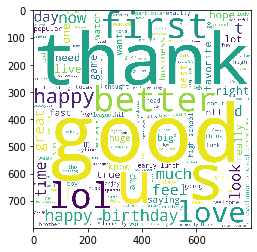

In [69]:
neg=''
pos=''
neu=''


for i in range(0,len(dataset)):
    if dataset['Label'][i]=="Neutral":
        tweet=dataset['Tweet'][i]
        tweet=str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neu += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Positive" or dataset['Label'][i] == "Weakly_Positive":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            pos += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Negative" or dataset['Label'][i] == "Weakly_Negative":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neg += token.lower() + ' '

stopwords = set(STOPWORDS)


wordcloud1=WordCloud(background_color='white',width=800,height=800,stopwords=stopwords,min_font_size=10).generate(pos)

plt.imshow(wordcloud1)

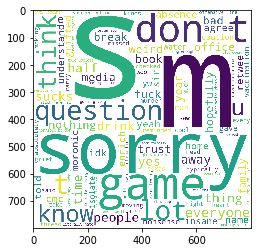

In [70]:
wordcloud2 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neg)

plt.imshow(wordcloud2)

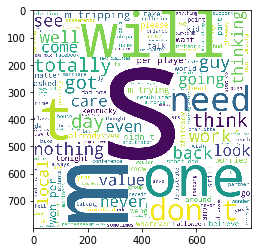

In [71]:
wordcloud3 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neu)

plt.imshow(wordcloud3)

# SputnikV

SputnikV
sputnik
SputnikLight
Neutral            607
Weakly_Positive    270
Highly_Positive    219
Highly_Negative    111
Weakly_Negative     46
Name: Label, dtype: int64


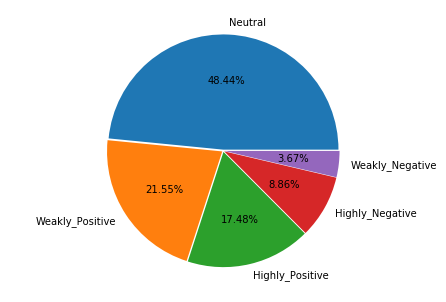

In [25]:
list1 = ["SputnikV", "sputnik", "SputnikLight","Sputnik"]
dataset = vaccine(list1, 100)
dataset=sentiMent(dataset)
img=sentiFig(dataset)

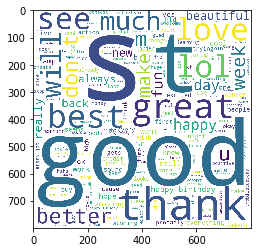

In [26]:
neg=''
pos=''
neu=''


for i in range(0,len(dataset)):
    if dataset['Label'][i]=="Neutral":
        tweet=dataset['Tweet'][i]
        tweet=str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neu += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Positive" or dataset['Label'][i] == "Weakly_Positive":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            pos += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Negative" or dataset['Label'][i] == "Weakly_Negative":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neg += token.lower() + ' '

stopwords = set(STOPWORDS)


wordcloud1=WordCloud(background_color='white',width=800,height=800,stopwords=stopwords,min_font_size=10).generate(pos)

plt.imshow(wordcloud1)

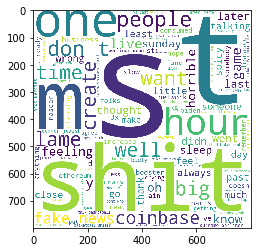

In [27]:
wordcloud2 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neg)

plt.imshow(wordcloud2)

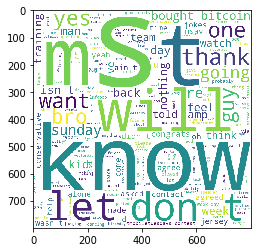

In [28]:
wordcloud3 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neu)

plt.imshow(wordcloud3)

# Pfizer

Pfizer
PfizerVaccine
Neutral            368
Weakly_Positive    176
Highly_Positive    145
Highly_Negative     71
Weakly_Negative     33
Name: Label, dtype: int64


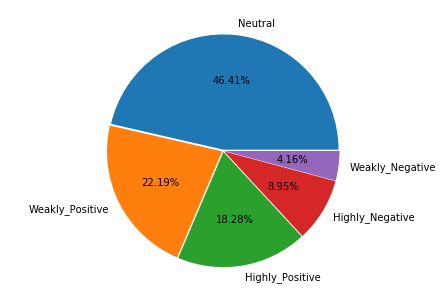

In [29]:
list1 = ["Pfizer", "PfizerVaccine","Pfizer vaccine", "pfizer vaccine side effects"]
dataset = vaccine(list1, 100)
dataset=sentiMent(dataset)
img=sentiFig(dataset)

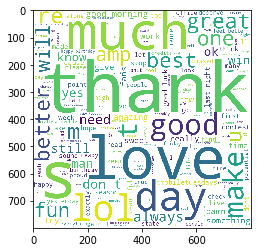

In [30]:
neg=''
pos=''
neu=''


for i in range(0,len(dataset)):
    if dataset['Label'][i]=="Neutral":
        tweet=dataset['Tweet'][i]
        tweet=str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neu += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Positive" or dataset['Label'][i] == "Weakly_Positive":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            pos += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Negative" or dataset['Label'][i] == "Weakly_Negative":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neg += token.lower() + ' '

stopwords = set(STOPWORDS)


wordcloud1=WordCloud(background_color='white',width=800,height=800,stopwords=stopwords,min_font_size=10).generate(pos)

plt.imshow(wordcloud1)

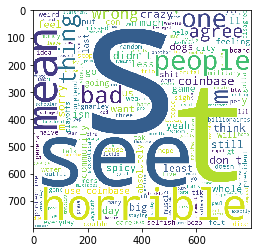

In [31]:
wordcloud2 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neg)

plt.imshow(wordcloud2)

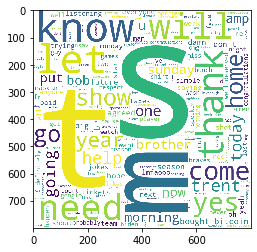

In [32]:
wordcloud3 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neu)

plt.imshow(wordcloud3)

# Mexico

In [76]:
import tweepy
from tweepy.streaming import StreamListener
from tweepy import *
import pandas as pd



def extractTweets(keyword, count, item):
    api_key = "EmGjNutMOFkjcOJhrkiEkqVXq"
    api_secret = "XjElQEoclGogHUUlaicIbfYjbl1YNLLyhO5WkhjTVM4VmV1JpG"

    access_token = "1393248498502483968-Npak2qPjOGBRhaQRLEq1ZjmIwfKxol"
    access_secret = "XOKJiqKqn8VF7yTzq8LpXYFu4OcEaexqP6ns3yxtTuIYu"

    auth = tweepy.OAuthHandler(api_key, api_secret)
    auth.set_access_token(access_token, access_secret)

    apitweet = tweepy.API(auth)

    df = pd.DataFrame(columns=['DateTime', 'Tweet_Id', 'Tweet', 'User_Id', 'Retweet', 'Location', 'Label'])

    n = 0
    
    api = tweepy.API(auth)
    places = api.geo_search(query="Mexico",lat='19.432608',long='-99.133209',granularity="city")
    place_id = places[0].id

    tweets = tweepy.Cursor(apitweet.search, wait_on_rate_limit=True, q=keyword and "place:%s" % place_id,
                           lang="en", count=count).items(item)
    for tw in tweets:

        try:
            if tw.text!="" and tw.id !="" and tw.entities['user_mentions'][0]['id']!="":
                df.loc[n, 'DateTime'] = tw.created_at
                df.loc[n, 'Location'] = tw.user.location
                df.loc[n, 'Retweet'] = tw.retweet_count
                df.loc[n, 'Tweet_Id'] = tw.id
                df.loc[n, 'User_Id'] = tw.entities['user_mentions'][0]['id']
                df.loc[n, 'Tweet'] = tw.text

            n += 1

        except:
            pass

    df.drop_duplicates(subset="Tweet", keep=False, inplace=True)

    df.reset_index(inplace=True)
    df = df.drop(columns=['index'])

    for i in range(len(df)):
        df['Tweet'][i] = cleanTweet(df['Tweet'][i])

    return df


def vaccine(list1, j):
    tempdf = pd.DataFrame(columns=['DateTime', 'Tweet_Id', 'Tweet', 'User_Id', 'Retweet', 'Location', 'Label'])
    for i in list1:
        print(i)
        tempdf=tempdf.append(extractTweets(i, j, 500),ignore_index=True)
    return tempdf


# AstraZeneca

AstraZeneca
astrazenecavaccine
OXFORDVACCINE
GenXZeneca
Neutral            476
Highly_Positive    200
Weakly_Positive    124
Highly_Negative     32
Weakly_Negative     20
Name: Label, dtype: int64


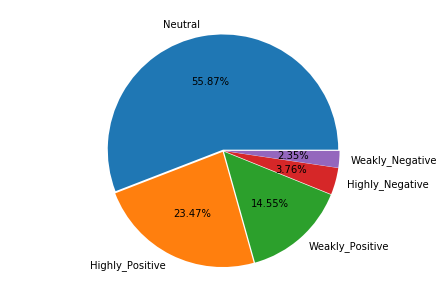

In [36]:
list1 = ["AstraZeneca", "astrazenecavaccine", "OXFORDVACCINE", "GenXZeneca"]

dataset = vaccine(list1, 100)
dataset=sentiMent(dataset)
img=sentiFig(dataset)

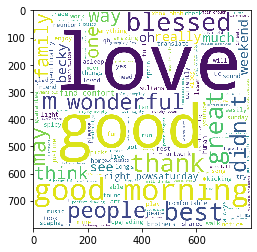

In [37]:
neg=''
pos=''
neu=''


for i in range(0,len(dataset)):
    if dataset['Label'][i]=="Neutral":
        tweet=dataset['Tweet'][i]
        tweet=str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neu += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Positive" or dataset['Label'][i] == "Weakly_Positive":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            pos += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Negative" or dataset['Label'][i] == "Weakly_Negative":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neg += token.lower() + ' '

stopwords = set(STOPWORDS)


wordcloud1=WordCloud(background_color='white',width=800,height=800,stopwords=stopwords,min_font_size=10).generate(pos)

plt.imshow(wordcloud1)

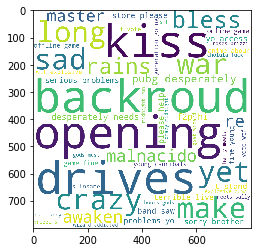

In [39]:
wordcloud2 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neg)

plt.imshow(wordcloud2)

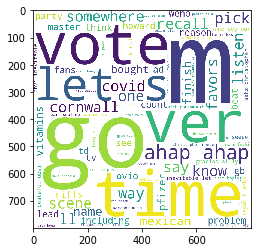

In [40]:
wordcloud3 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neu)

plt.imshow(wordcloud3)

# Covishield

covishield
covishieldvaccine
covishieldsideeffects
covishieldvaccinesideeffects
Neutral            476
Highly_Positive    200
Weakly_Positive    124
Highly_Negative     32
Weakly_Negative     20
Name: Label, dtype: int64


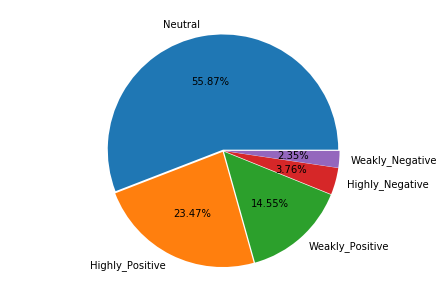

In [41]:
list1 = ["covishield", "covishieldvaccine", "covishieldsideeffects","covishieldvaccinesideeffects"]
dataset = vaccine(list1, 100)
dataset=sentiMent(dataset)
img=sentiFig(dataset)

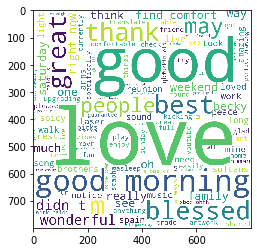

In [42]:
neg=''
pos=''
neu=''


for i in range(0,len(dataset)):
    if dataset['Label'][i]=="Neutral":
        tweet=dataset['Tweet'][i]
        tweet=str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neu += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Positive" or dataset['Label'][i] == "Weakly_Positive":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            pos += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Negative" or dataset['Label'][i] == "Weakly_Negative":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neg += token.lower() + ' '

stopwords = set(STOPWORDS)


wordcloud1=WordCloud(background_color='white',width=800,height=800,stopwords=stopwords,min_font_size=10).generate(pos)

plt.imshow(wordcloud1)

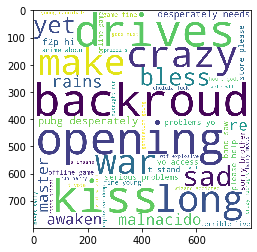

In [43]:
wordcloud2 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neg)

plt.imshow(wordcloud2)

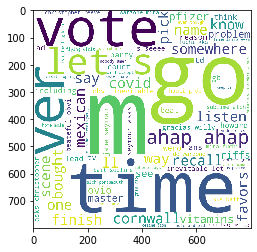

In [44]:
wordcloud3 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neu)

plt.imshow(wordcloud3)

# Covaxin

#covaxin
#covaxine
#BharatBiotech
#covaxininhungary
Neutral            476
Highly_Positive    200
Weakly_Positive    124
Highly_Negative     32
Weakly_Negative     20
Name: Label, dtype: int64


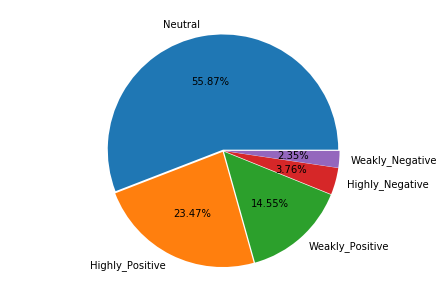

In [45]:
list1 = ["#covaxin", "#covaxine", "#BharatBiotech", "#covaxininhungary"]
dataset = vaccine(list1, 100)
dataset=sentiMent(dataset)
img=sentiFig(dataset)

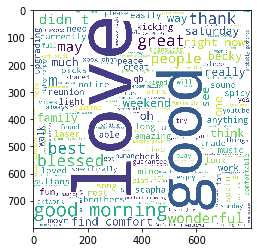

In [46]:
import math

import re

from wordcloud import WordCloud, STOPWORDS

from matplotlib import pyplot as plt

neg=''
pos=''
neu=''


for i in range(0,len(dataset)):
    if dataset['Label'][i]=="Neutral":
        tweet=dataset['Tweet'][i]
        tweet=str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neu += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Positive" or dataset['Label'][i] == "Weakly_Positive":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            pos += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Negative" or dataset['Label'][i] == "Weakly_Negative":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neg += token.lower() + ' '

stopwords = set(STOPWORDS)


wordcloud1=WordCloud(background_color='white',width=800,height=800,stopwords=stopwords,min_font_size=10).generate(pos)

plt.imshow(wordcloud1)

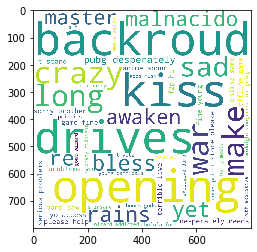

In [47]:
wordcloud2 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neg)

plt.imshow(wordcloud2)

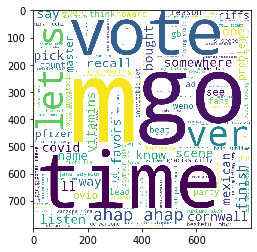

In [48]:
wordcloud3 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neu)

plt.imshow(wordcloud3)

# Moderna

Moderna
moderna booster
moderna booster side effects
moderna booster side-effects
Neutral            480
Highly_Positive    196
Weakly_Positive    124
Highly_Negative     32
Weakly_Negative     20
Name: Label, dtype: int64


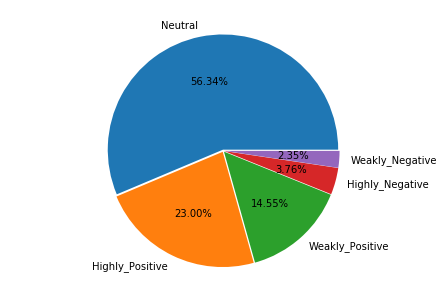

In [49]:
list1 = ["Moderna",'moderna booster','moderna booster side effects','moderna booster side-effects']
dataset = vaccine(list1, 100)
dataset=sentiMent(dataset)
img=sentiFig(dataset)

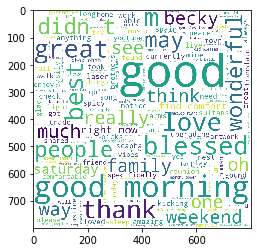

In [53]:
neg=''
pos=''
neu=''


for i in range(0,len(dataset)):
    if dataset['Label'][i]=="Neutral":
        tweet=dataset['Tweet'][i]
        tweet=str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neu += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Positive" or dataset['Label'][i] == "Weakly_Positive":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            pos += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Negative" or dataset['Label'][i] == "Weakly_Negative":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neg += token.lower() + ' '

stopwords = set(STOPWORDS)


wordcloud1=WordCloud(background_color='white',width=800,height=800,stopwords=stopwords,min_font_size=10).generate(pos)

plt.imshow(wordcloud1)

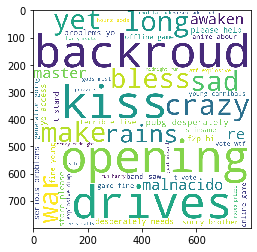

In [56]:
wordcloud2 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neg)

plt.imshow(wordcloud2)

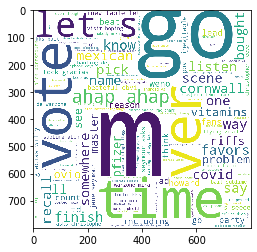

In [57]:
wordcloud3 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neu)

plt.imshow(wordcloud3)

# SputnikV

SputnikV
sputnik
SputnikLight
Sputnik
Neutral            480
Highly_Positive    196
Weakly_Positive    124
Highly_Negative     32
Weakly_Negative     20
Name: Label, dtype: int64


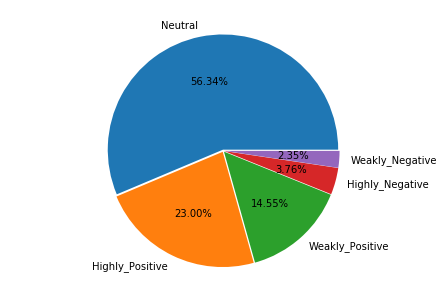

In [77]:
list1 = ["SputnikV", "sputnik", "SputnikLight","Sputnik"]
dataset = vaccine(list1, 100)
dataset=sentiMent(dataset)
img=sentiFig(dataset)

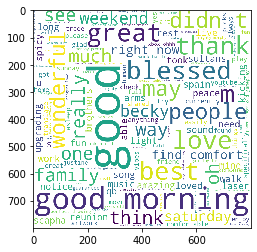

In [78]:
neg=''
pos=''
neu=''


for i in range(0,len(dataset)):
    if dataset['Label'][i]=="Neutral":
        tweet=dataset['Tweet'][i]
        tweet=str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neu += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Positive" or dataset['Label'][i] == "Weakly_Positive":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            pos += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Negative" or dataset['Label'][i] == "Weakly_Negative":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neg += token.lower() + ' '

stopwords = set(STOPWORDS)


wordcloud1=WordCloud(background_color='white',width=800,height=800,stopwords=stopwords,min_font_size=10).generate(pos)

plt.imshow(wordcloud1)

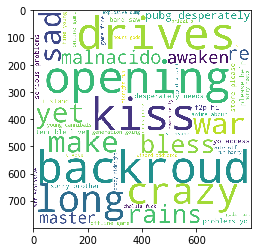

In [79]:
wordcloud2 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neg)

plt.imshow(wordcloud2)

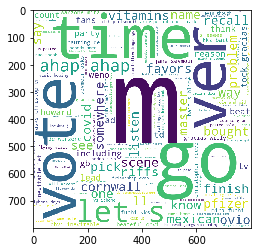

In [80]:
wordcloud3 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neu)

plt.imshow(wordcloud3)

# Pfizer

Pfizer
PfizerVaccine
Pfizer vaccine
pfizer vaccine side effects
Neutral            480
Highly_Positive    196
Weakly_Positive    124
Highly_Negative     32
Weakly_Negative     20
Name: Label, dtype: int64


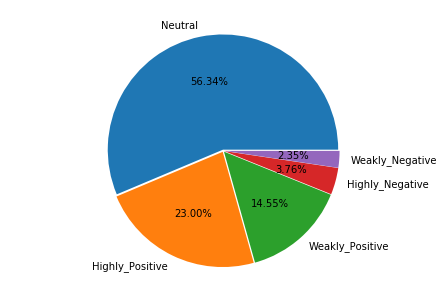

In [81]:
list1 = ["Pfizer", "PfizerVaccine","Pfizer vaccine", "pfizer vaccine side effects"]
dataset = vaccine(list1, 100)
dataset=sentiMent(dataset)
img=sentiFig(dataset)

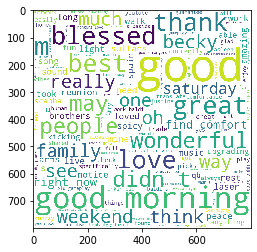

In [82]:
neg=''
pos=''
neu=''


for i in range(0,len(dataset)):
    if dataset['Label'][i]=="Neutral":
        tweet=dataset['Tweet'][i]
        tweet=str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neu += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Positive" or dataset['Label'][i] == "Weakly_Positive":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            pos += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Negative" or dataset['Label'][i] == "Weakly_Negative":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neg += token.lower() + ' '

stopwords = set(STOPWORDS)


wordcloud1=WordCloud(background_color='white',width=800,height=800,stopwords=stopwords,min_font_size=10).generate(pos)

plt.imshow(wordcloud1)

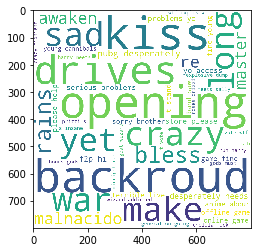

In [83]:
wordcloud2 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neg)

plt.imshow(wordcloud2)

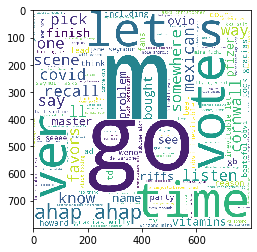

In [84]:
wordcloud3 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neu)

plt.imshow(wordcloud3)

# Brazil

In [110]:
import tweepy
from tweepy.streaming import StreamListener
from tweepy import *
import pandas as pd



def extractTweets(keyword, count, item):
    api_key = "EmGjNutMOFkjcOJhrkiEkqVXq"
    api_secret = "XjElQEoclGogHUUlaicIbfYjbl1YNLLyhO5WkhjTVM4VmV1JpG"

    access_token = "1393248498502483968-Npak2qPjOGBRhaQRLEq1ZjmIwfKxol"
    access_secret = "XOKJiqKqn8VF7yTzq8LpXYFu4OcEaexqP6ns3yxtTuIYu"
    auth = tweepy.OAuthHandler(api_key, api_secret)
    auth.set_access_token(access_token, access_secret)

    apitweet = tweepy.API(auth)

    df = pd.DataFrame(columns=['DateTime', 'Tweet_Id', 'Tweet', 'User_Id', 'Retweet', 'Location', 'Label'])

    n = 0
    
    api = tweepy.API(auth)
    places = api.geo_search(query="Brazil",granularity="country")
    place_id = places[0].id

    tweets = tweepy.Cursor(apitweet.search, wait_on_rate_limit=True, q=keyword and "place:%s" % place_id,
                           lang="en", count=count).items(item)
    for tw in tweets:

        try:
            if tw.text!="" and tw.id !="" and tw.entities['user_mentions'][0]['id']!="":
                df.loc[n, 'DateTime'] = tw.created_at
                df.loc[n, 'Location'] = tw.user.location
                df.loc[n, 'Retweet'] = tw.retweet_count
                df.loc[n, 'Tweet_Id'] = tw.id
                df.loc[n, 'User_Id'] = tw.entities['user_mentions'][0]['id']
                df.loc[n, 'Tweet'] = tw.text

            n += 1

        except:
            pass

    df.drop_duplicates(subset="Tweet", keep=False, inplace=True)

    df.reset_index(inplace=True)
    df = df.drop(columns=['index'])

    for i in range(len(df)):
        df['Tweet'][i] = cleanTweet(df['Tweet'][i])

    return df


def vaccine(list1, j):
    tempdf = pd.DataFrame(columns=['DateTime', 'Tweet_Id', 'Tweet', 'User_Id', 'Retweet', 'Location', 'Label'])
    for i in list1:
        print(i)
        tempdf=tempdf.append(extractTweets(i, j, 500),ignore_index=True)
    return tempdf


# Astrazeneca

AstraZeneca
astrazenecavaccine
OXFORDVACCINE
GenXZeneca
Neutral            536
Highly_Positive     92
Weakly_Positive     85
Highly_Negative     32
Weakly_Negative     12
Name: Label, dtype: int64


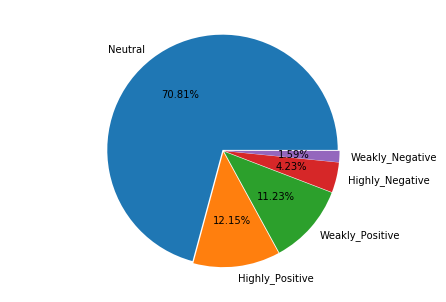

In [95]:
list1 = ["AstraZeneca", "astrazenecavaccine", "OXFORDVACCINE", "GenXZeneca"]

dataset = vaccine(list1, 100)
dataset=sentiMent(dataset)
img=sentiFig(dataset)

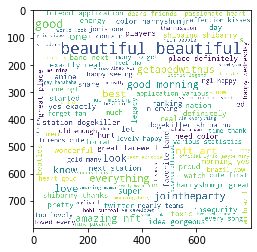

In [96]:
neg=''
pos=''
neu=''


for i in range(0,len(dataset)):
    if dataset['Label'][i]=="Neutral":
        tweet=dataset['Tweet'][i]
        tweet=str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neu += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Positive" or dataset['Label'][i] == "Weakly_Positive":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            pos += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Negative" or dataset['Label'][i] == "Weakly_Negative":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neg += token.lower() + ' '

stopwords = set(STOPWORDS)


wordcloud1=WordCloud(background_color='white',width=800,height=800,stopwords=stopwords,min_font_size=10).generate(pos)

plt.imshow(wordcloud1)

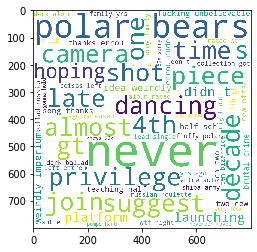

In [97]:
wordcloud2 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neg)

plt.imshow(wordcloud2)

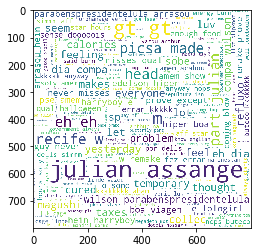

In [98]:
wordcloud3 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neu)

plt.imshow(wordcloud3)

# Covishield

covishield
covishieldvaccine
covishieldsideeffects
covishieldvaccinesideeffects
Neutral            536
Highly_Positive     92
Weakly_Positive     88
Highly_Negative     32
Weakly_Negative     12
Name: Label, dtype: int64


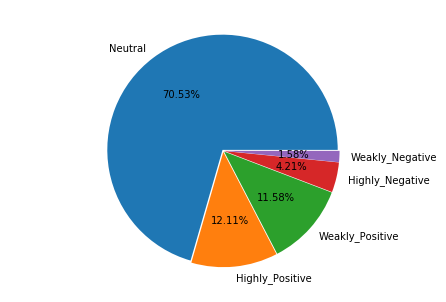

In [99]:
list1 = ["covishield", "covishieldvaccine", "covishieldsideeffects","covishieldvaccinesideeffects"]
dataset = vaccine(list1, 100)
dataset=sentiMent(dataset)
img=sentiFig(dataset)

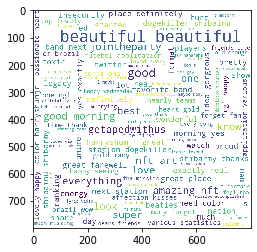

In [100]:
neg=''
pos=''
neu=''


for i in range(0,len(dataset)):
    if dataset['Label'][i]=="Neutral":
        tweet=dataset['Tweet'][i]
        tweet=str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neu += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Positive" or dataset['Label'][i] == "Weakly_Positive":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            pos += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Negative" or dataset['Label'][i] == "Weakly_Negative":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neg += token.lower() + ' '

stopwords = set(STOPWORDS)


wordcloud1=WordCloud(background_color='white',width=800,height=800,stopwords=stopwords,min_font_size=10).generate(pos)

plt.imshow(wordcloud1)

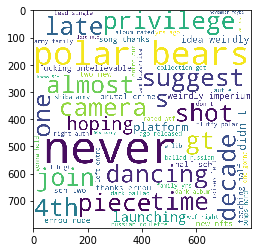

In [101]:
wordcloud2 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neg)

plt.imshow(wordcloud2)

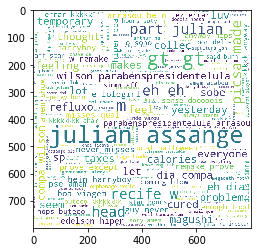

In [102]:
wordcloud3 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neu)

plt.imshow(wordcloud3)

# Covaxin

#covaxin
#covaxine
#BharatBiotech
#covaxininhungary
Neutral            538
Highly_Positive     92
Weakly_Positive     88
Highly_Negative     32
Weakly_Negative     12
Name: Label, dtype: int64


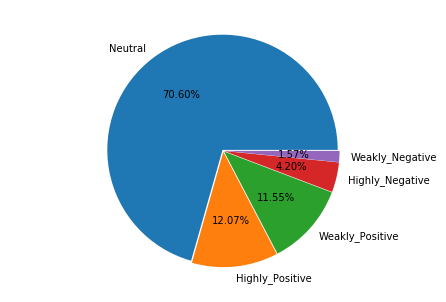

In [103]:
list1 = ["#covaxin", "#covaxine", "#BharatBiotech", "#covaxininhungary"]
dataset = vaccine(list1, 100)
dataset=sentiMent(dataset)
img=sentiFig(dataset)

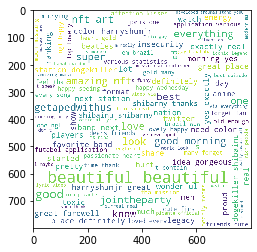

In [104]:
neg=''
pos=''
neu=''


for i in range(0,len(dataset)):
    if dataset['Label'][i]=="Neutral":
        tweet=dataset['Tweet'][i]
        tweet=str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neu += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Positive" or dataset['Label'][i] == "Weakly_Positive":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            pos += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Negative" or dataset['Label'][i] == "Weakly_Negative":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neg += token.lower() + ' '

stopwords = set(STOPWORDS)


wordcloud1=WordCloud(background_color='white',width=800,height=800,stopwords=stopwords,min_font_size=10).generate(pos)

plt.imshow(wordcloud1)

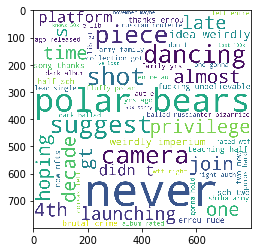

In [107]:
wordcloud2 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neg)

plt.imshow(wordcloud2)

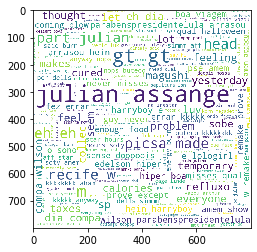

In [108]:
wordcloud3 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neu)

plt.imshow(wordcloud3)

# Moderna

Moderna
moderna booster
moderna booster side effects
moderna booster side-effects
Neutral            532
Highly_Positive    111
Weakly_Positive     69
Highly_Negative     36
Weakly_Negative     16
Name: Label, dtype: int64


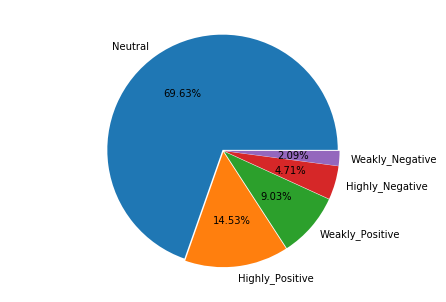

In [112]:
list1 = ["Moderna",'moderna booster','moderna booster side effects','moderna booster side-effects']
dataset = vaccine(list1, 100)
dataset=sentiMent(dataset)
img=sentiFig(dataset)

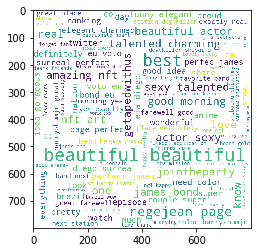

In [113]:
neg=''
pos=''
neu=''


for i in range(0,len(dataset)):
    if dataset['Label'][i]=="Neutral":
        tweet=dataset['Tweet'][i]
        tweet=str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neu += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Positive" or dataset['Label'][i] == "Weakly_Positive":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            pos += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Negative" or dataset['Label'][i] == "Weakly_Negative":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neg += token.lower() + ' '

stopwords = set(STOPWORDS)


wordcloud1=WordCloud(background_color='white',width=800,height=800,stopwords=stopwords,min_font_size=10).generate(pos)

plt.imshow(wordcloud1)

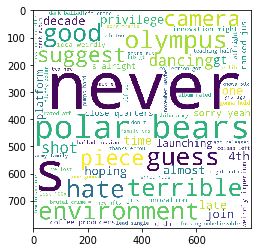

In [114]:
wordcloud2 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neg)

plt.imshow(wordcloud2)

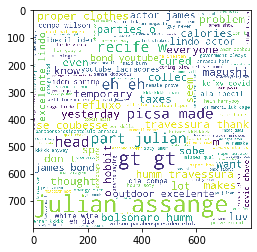

In [115]:
wordcloud3 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neu)

plt.imshow(wordcloud3)

# SputnikV

SputnikV
sputnik
SputnikLight
Sputnik
Neutral            535
Highly_Positive    108
Weakly_Positive     67
Highly_Negative     36
Weakly_Negative     24
Name: Label, dtype: int64


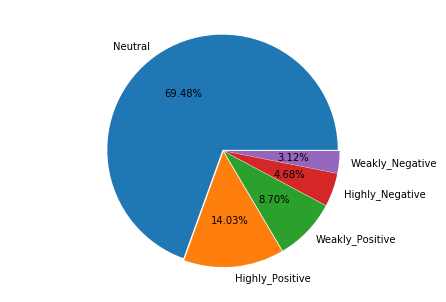

In [116]:
list1 = ["SputnikV", "sputnik", "SputnikLight","Sputnik"]
dataset = vaccine(list1, 100)
dataset=sentiMent(dataset)
img=sentiFig(dataset)

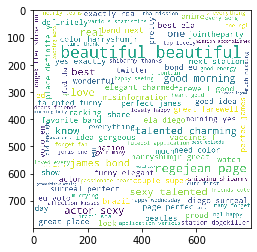

In [117]:
neg=''
pos=''
neu=''


for i in range(0,len(dataset)):
    if dataset['Label'][i]=="Neutral":
        tweet=dataset['Tweet'][i]
        tweet=str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neu += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Positive" or dataset['Label'][i] == "Weakly_Positive":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            pos += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Negative" or dataset['Label'][i] == "Weakly_Negative":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neg += token.lower() + ' '

stopwords = set(STOPWORDS)


wordcloud1=WordCloud(background_color='white',width=800,height=800,stopwords=stopwords,min_font_size=10).generate(pos)

plt.imshow(wordcloud1)

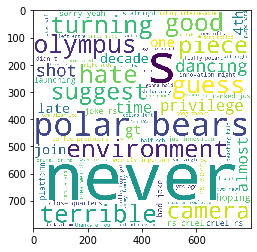

In [118]:
wordcloud2 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neg)

plt.imshow(wordcloud2)

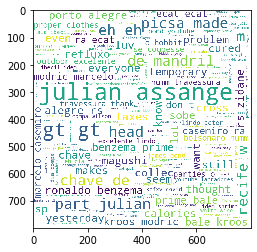

In [119]:
wordcloud3 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neu)

plt.imshow(wordcloud3)

# Pfizer

Pfizer
PfizerVaccine
Pfizer vaccine
pfizer vaccine side effects
Neutral            540
Highly_Positive    110
Weakly_Positive     68
Highly_Negative     36
Weakly_Negative     24
Name: Label, dtype: int64


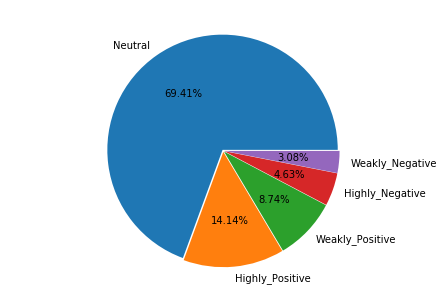

In [120]:
list1 = list1 = ["Pfizer", "PfizerVaccine","Pfizer vaccine", "pfizer vaccine side effects"]
dataset = vaccine(list1, 100)
dataset=sentiMent(dataset)
img=sentiFig(dataset)

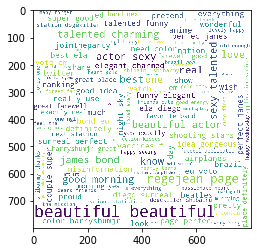

In [121]:
neg=''
pos=''
neu=''


for i in range(0,len(dataset)):
    if dataset['Label'][i]=="Neutral":
        tweet=dataset['Tweet'][i]
        tweet=str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neu += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Positive" or dataset['Label'][i] == "Weakly_Positive":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            pos += token.lower() + ' '

    elif dataset['Label'][i] == "Highly_Negative" or dataset['Label'][i] == "Weakly_Negative":
        tweet = dataset['Tweet'][i]
        tweet = str(tweet)
        tweet = tweet.replace('RT', '')
        tweet = tweet.split(' ')
        for token in tweet:
            neg += token.lower() + ' '

stopwords = set(STOPWORDS)


wordcloud1=WordCloud(background_color='white',width=800,height=800,stopwords=stopwords,min_font_size=10).generate(pos)

plt.imshow(wordcloud1)

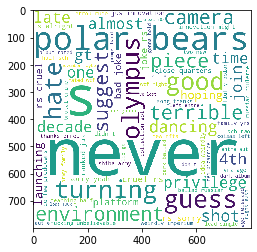

In [122]:
wordcloud2 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neg)

plt.imshow(wordcloud2)

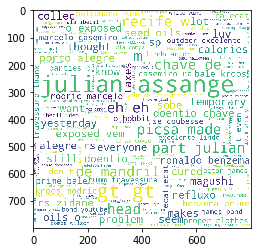

In [123]:
wordcloud3 = WordCloud(background_color='white',width=800, height=800, stopwords=stopwords, min_font_size=10).generate(neu)

plt.imshow(wordcloud3)

# Brazil

In [1]:
import re
from textblob import TextBlob

def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a',
                "N": 'n',
                "V": 'v',
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]
    lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)


def cleanTweet(tweet):

    # Remove Links, Special Characters etc from tweet
    tweet=re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)

    tweet=re.sub('RT','',tweet)
    tweet=' '.join(re.sub("@[\w]*"," ",tweet).split())
        
    tweet=' '.join(re.sub("([^a-zA-Z0-9#])"," ",tweet).split())

    tweet=lemmatize_with_postag(tweet)
                             
    return tweet

In [14]:

from textblob import TextBlob

import pandas as pd


def sentiMent(dataset):

    
    for i in range(0,len(dataset)):
        tweet1 = dataset['Tweet'][i]
        analysis=TextBlob(tweet1)
        
        if analysis.polarity==0:
            l='Neutral'
        
        elif analysis.polarity > 0:
            if analysis.polarity<0.5:
                l='Weakly_Positive'
            else:
                l='Highly_Positive'
        elif analysis.polarity < 0 :
            if analysis.polarity>-0.5:
                l='Highly_Negative'
            else:
                l='Weakly_Negative'
        
            
         
        dataset['Label'][i]=l
       
        
    return dataset
        

In [3]:
import tweepy
from tweepy.streaming import StreamListener
from tweepy import *
import pandas as pd

def extractTweets(keyword, count,item):
    api_key = "EmGjNutMOFkjcOJhrkiEkqVXq"
    api_secret = "XjElQEoclGogHUUlaicIbfYjbl1YNLLyhO5WkhjTVM4VmV1JpG"

    access_token = "1393248498502483968-Npak2qPjOGBRhaQRLEq1ZjmIwfKxol"
    access_secret = "XOKJiqKqn8VF7yTzq8LpXYFu4OcEaexqP6ns3yxtTuIYu"

    auth = tweepy.OAuthHandler(api_key, api_secret)
    auth.set_access_token(access_token, access_secret)

    df = pd.DataFrame(columns=['DateTime', 'Tweet_Id', 'Tweet', 'User_Id', 'Retweet', 'Location', 'Label','Country'])

    n = 0
    api = tweepy.API(auth)
    places = api.geo_search(query="Brazil",granularity="country")
    place_id = places[0].id

    tweets = tweepy.Cursor(api.search, wait_on_rate_limit=True, q=keyword and place_id,
                           lang="en", count=count).items(item)    
    for tw in tweets:

        try:
            if tw.text!="" and tw.id !="" and tw.entities['user_mentions'][0]['id']!="":
                df.loc[n, 'DateTime'] = tw.created_at
                df.loc[n, 'Location'] = tw.user.location
                df.loc[n, 'Retweet'] = tw.retweet_count
                df.loc[n, 'Tweet_Id'] = tw.id
                df.loc[n, 'User_Id'] = tw.entities['user_mentions'][0]['id']
                df.loc[n, 'Tweet'] = tw.text

            n += 1

        except:
            pass

    df.drop_duplicates(subset="Tweet", keep=False, inplace=True)

    df.reset_index(inplace=True)
    df = df.drop(columns=['index'])

    for i in range(len(df)):
        df['Tweet'][i] = cleanTweet(df['Tweet'][i])

    return df


def vaccine(list1, j):
    tempdf = pd.DataFrame(columns=['DateTime', 'Tweet_Id', 'Tweet', 'User_Id', 'Retweet', 'Location', 'Label','Country'])
    for i in list1:
        print(i)
        tempdf=tempdf.append(extractTweets(i, j,250),ignore_index=True)
    return tempdf


In [4]:
def summary(dataset):
    tempdf = pd.DataFrame(columns=["Name", "Total_Tweets", "Positive_Tweets_per", "NonPositive_Tweets_per"])

    for name, df in dataset.items():
        total = 0
        temp = df['Label'].value_counts()
        for i in temp.values:
            total += i
        print(temp)

        pos = temp['Highly_Positive'] + temp['Weakly_Positive']
        neg = ((total - pos) / total) * 100
        pos=(pos/total) * 100
        pos=round(pos,2)
        neg = round(neg, 2)

        list1 = [name, total, pos, neg]
        tempdf = tempdf.append(
            pd.Series(list1, index=["Name", "Total_Tweets", "Positive_Tweets_per", "NonPositive_Tweets_per"]),ignore_index=True)
    tempdf=tempdf.sort_values(by=['Positive_Tweets_per'],ascending=False)
    tempdf=tempdf.reset_index()
    return tempdf

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def bar(dataset):
    list1=[]
    list2=[]
    for i in range(len(dataset)):
        list1.append(dataset['Name'][i])

    for i in range(len(dataset)):
        list2.append(dataset["Positive_Tweets_per"][i])
    fig = plt.figure(figsize=(10, 5))

    # creating the bar plot
    plt.bar(list1, list2, color='orange',
            width=0.4)

    plt.xlabel("Vaccine Name")
    plt.ylabel("Positive Tweets %")
    plt.title("Vaccine ranking based on positive tweets %")

    plt.savefig("D:/vaccine/static/bar.png", bbox_inches='tight')
    plt.close()
    return True

In [6]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import matplotlib.patches as p
def donut(d):
    for i in range(len(d)):
        list1=[d["Positive_Tweets_per"][i],d["NonPositive_Tweets_per"][i]]
        colors = ['#00FF00', '#fedc02']
        explode = (0.03, 0.03)
        l2=["Positive_Tweets_per","NonPositive_Tweets_per"]
# Pie Chart
        angle = -180 * list1[0]
        plt.pie(list1, colors=colors, labels=l2, startangle= angle,
            autopct='%1.1f%%', pctdistance=0.85,
            explode=explode)

# draw circle
        centre_circle = plt.Circle((0, 0), 0.60, fc='white')
        fig = plt.gcf()

# Adding Circle in Pie chart
        fig.gca().add_artist(centre_circle)


        # Adding Title of chart
        plt.title('Positive Tweets % vs Non-Positive Tweets %')

# Displaing Chart
        k = i
        plt.savefig("D:/vaccine/static/"+str(k)+".png", bbox_inches='tight')
        plt.close()
    return True



In [8]:
list2 = ['AstraZeneca','Covishield','Moderna']
for i in list2:
    if i == "AstraZeneca":
        list1 = ["AstraZeneca", "astrazenecavaccine", "OXFORDVACCINE", "GenXZeneca"]
    elif i == "Covishield":
        list1 = ["covishield", "covishieldvaccine", "covishieldsideeffects","covishieldvaccinesideeffects"]
    elif i == "Moderna":
        list1 = ["Moderna",'moderna booster','moderna booster side effects','moderna booster side-effects']
        
    df = vaccine(list1, 100)

    if i == "AstraZeneca":
        df1 = df
    elif i == "Covishield":
        df2 = df
    elif i == "Moderna":
        df3 = df


df1 = sentiMent(df1)
df1.to_csv("D:/vaccine/AstraZenecaLive.csv")
df2 = sentiMent(df2)
df2.to_csv("D:/vaccine/CovishieldLive.csv") 
df3 = sentiMent(df3)
df3.to_csv("D:/vaccine/ModernaLive.csv")

AstraZeneca
astrazenecavaccine
OXFORDVACCINE
GenXZeneca
covishield
covishieldvaccine
covishieldsideeffects
covishieldvaccinesideeffects
Moderna
moderna booster
moderna booster side effects
moderna booster side-effects


In [10]:
list2 = ['SputnikV','Pfizer',"Covaxin"]
for i in list2:
    if i == "Pfizer":
        list1 = ["Pfizer", "PfizerVaccine","Pfizer vaccine", "pfizer vaccine side effects"]
    elif i == "Covaxin":
        list1 = ["#covaxin", "#covaxine", "#BharatBiotech", "#covaxininhungary"]
    
    elif i == "SputnikV":
        list1 = ["SputnikV", "sputnik", "SputnikLight","Sputnik"]
        
        
    df = vaccine(list1, 100)
    print(df)

    if i == "Pfizer":
        df5 = df
    elif i == "Covaxin":
        df6 = df
    elif i == "SputnikV":
        df4=df

df4 = sentiMent(df4)
df4.to_csv("D:/vaccine/PfizerLive.csv")
df5 = sentiMent(df5)
df5.to_csv("D:/vaccine/PfizerLive.csv")
df6 = sentiMent(df6)
df6.to_csv("D:/vaccine/CovaxinLive.csv")

SputnikV
sputnik
SputnikLight
Sputnik


RateLimitError: [{'message': 'Rate limit exceeded', 'code': 88}]

In [ ]:
d = summary(tempdf)

In [20]:
img1 = donut(d)

In [21]:
img2 = bar(d)

In [49]:
tempdf={"AstraZeneca":df1, "Covishield":df2, "Moderna":df3,'SputnikV':df4, 'Pfizer':df5, 'Covaxin':df6}

In [7]:
list1 = ["AstraZeneca", "astrazenecavaccine", "OXFORDVACCINE", "GenXZeneca"]
df = vaccine(list1, 100)
df = sentiMent(df)
img2=sentiFig(df)

AstraZeneca
astrazenecavaccine
OXFORDVACCINE
GenXZeneca


RateLimitError: [{'message': 'Rate limit exceeded', 'code': 88}]

# World

In [10]:
import re
from textblob import TextBlob

def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a',
                "N": 'n',
                "V": 'v',
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]
    lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)


def cleanTweet(tweet):

    # Remove Links, Special Characters etc from tweet
    tweet=re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)

    tweet=re.sub('RT','',tweet)
    tweet=' '.join(re.sub("@[\w]*"," ",tweet).split())
        
    tweet=' '.join(re.sub("([^a-zA-Z0-9#])"," ",tweet).split())

    tweet=lemmatize_with_postag(tweet)
                             
    return tweet

In [11]:

from textblob import TextBlob

import pandas as pd


def sentiMent(dataset):

    
    for i in range(0,len(dataset)):
        tweet1 = dataset['Tweet'][i]
        analysis=TextBlob(tweet1)
        
        if analysis.polarity==0:
            l='Neutral'
        
        elif analysis.polarity > 0 and analysis.polarity < 1:
            l='Positive'
        elif analysis.polarity < 0 and analysis.polarity > -1:
            l='Negative'

        
            
         
        dataset['Label'][i]=l
       
        
    return dataset
        

In [12]:
import tweepy
from tweepy.streaming import StreamListener
from tweepy import *
import pandas as pd

def extractTweets(keyword, count):
    api_key = "EmGjNutMOFkjcOJhrkiEkqVXq"
    api_secret = "XjElQEoclGogHUUlaicIbfYjbl1YNLLyhO5WkhjTVM4VmV1JpG"

    access_token = "1393248498502483968-Npak2qPjOGBRhaQRLEq1ZjmIwfKxol"
    access_secret = "XOKJiqKqn8VF7yTzq8LpXYFu4OcEaexqP6ns3yxtTuIYu"

    auth = tweepy.OAuthHandler(api_key, api_secret)
    auth.set_access_token(access_token, access_secret)

    df = pd.DataFrame(columns=['DateTime', 'Tweet_Id', 'Tweet', 'User_Id', 'Retweet', 'Location', 'Label','Country'])

    n = 0
    api = tweepy.API(auth)

    tweets = tweepy.Cursor(api.search, wait_on_rate_limit=True, q=keyword,
                           lang="en", count=count).items(10000)    
    for tw in tweets:

        try:
            if tw.text!="" and tw.id !="" and tw.entities['user_mentions'][0]['id']!="":
                df.loc[n, 'DateTime'] = tw.created_at
                df.loc[n, 'Location'] = tw.user.location
                df.loc[n, 'Retweet'] = tw.retweet_count
                df.loc[n, 'Tweet_Id'] = tw.id
                df.loc[n, 'User_Id'] = tw.entities['user_mentions'][0]['id']
                df.loc[n, 'Tweet'] = tw.text

            n += 1

        except:
            pass

    df.drop_duplicates(subset="Tweet", keep=False, inplace=True)

    df.reset_index(inplace=True)
    df = df.drop(columns=['index'])

    for i in range(len(df)):
        df['Tweet'][i] = cleanTweet(df['Tweet'][i])

    return df


def vaccine(list1, j):
    tempdf = pd.DataFrame(columns=['DateTime', 'Tweet_Id', 'Tweet', 'User_Id', 'Retweet', 'Location', 'Label','Country'])
    for i in list1:
        print(i)
        tempdf=tempdf.append(extractTweets(i, j),ignore_index=True)
    return tempdf


In [13]:
import pandas as pd

import matplotlib.pyplot as plt


def sentiFig(dataset):
    sentiment = dataset['Label'].value_counts()

    print(sentiment)
    total = 0
    size = []

    for l in sentiment.values:
        total += l
        size.append(l)

    explode = []
    for m in range(len(sentiment)):
        explode.append(0.01)

    explode = tuple(explode)

    l2 = sentiment.keys()

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('equal')
    ax.pie(size, labels=l2, autopct='%1.2f%%', explode=explode)

    plt.show()

    
    return True

AstraZeneca
astrazenecavaccine
OXFORDVACCINE
GenXZeneca
Neutral     1498
Positive     588
Negative     235
Name: Label, dtype: int64


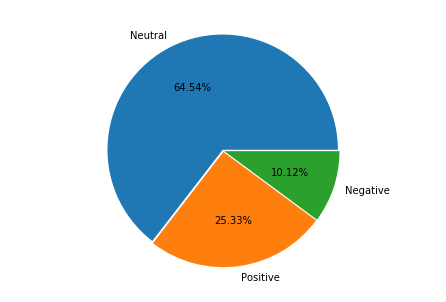

In [24]:
list1 = ["AstraZeneca", "astrazenecavaccine", "OXFORDVACCINE", "GenXZeneca"]
df = vaccine(list1, 100)
df = sentiMent(df)
img2 = sentiFig(df)

In [16]:
list1 = ["covishield", "covishieldvaccine", "covishieldsideeffects","covishieldvaccinesideeffects"]
df = vaccine(list1, 100)
df = sentiMent(df)
img2 = sentiFig(df)

covishield


KeyboardInterrupt: 

#covaxin
#covaxine
#BharatBiotech
#covaxininhungary
Neutral     491
Positive    301
Negative    184
Name: Label, dtype: int64


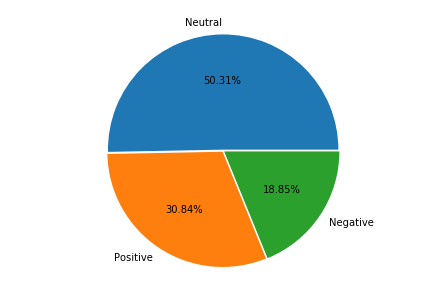

In [15]:
list1 = ["#covaxin", "#covaxine", "#BharatBiotech", "#covaxininhungary"]
df = vaccine(list1, 100)
df = sentiMent(df)
img2 = sentiFig(df)

Moderna
moderna booster
moderna booster side effects
moderna booster side-effects
Neutral     1506
Positive    1334
Negative     668
Name: Label, dtype: int64


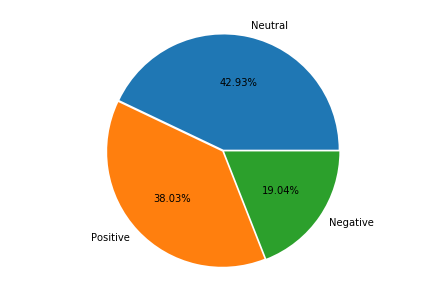

In [16]:
list1 = ["Moderna",'moderna booster','moderna booster side effects','moderna booster side-effects']
dataset = vaccine(list1, 100)
dataset=sentiMent(dataset)
img=sentiFig(dataset)

Pfizer
PfizerVaccine
Pfizer vaccine
pfizer vaccine side effects
Neutral     953
Positive    770
Negative    301
Name: Label, dtype: int64


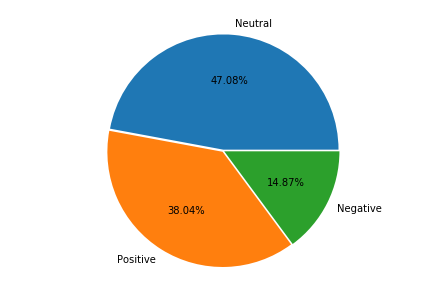

In [20]:
list1 = list1 = ["Pfizer", "PfizerVaccine","Pfizer vaccine", "pfizer vaccine side effects"]
dataset = vaccine(list1, 100)
dataset=sentiMent(dataset)
img=sentiFig(dataset)

SputnikV
sputnik
SputnikLight
Sputnik
Neutral     1507
Positive    1157
Negative     560
Name: Label, dtype: int64


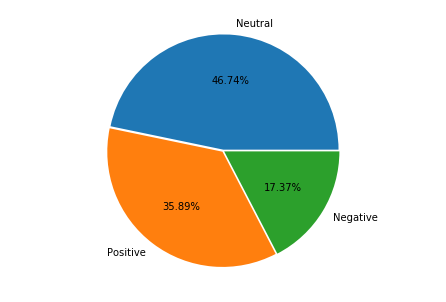

In [18]:
list1 = ["SputnikV", "sputnik", "SputnikLight","Sputnik"]
dataset = vaccine(list1, 100)
dataset=sentiMent(dataset)
img=sentiFig(dataset)